# **IMPORT PACKAGE**

In [1]:
import pandas as pd
import datetime
import os

# **DATA DEFINITION**

Pada bagian ini, dipetakan keyword yang akan digunakan untuk proses scrapping (per lapangan usaha), berikut juga dengan batasan waktu dari artikel yang ingin diambil. Di Badan Pusat Statistik, terdapat 17 sektor lapangan usaha, meliputi:
1.	Pertanian, Kehutanan, dan Perikanan
2.	Pertambangan dan Penggalian
3.	Industri Pengolahan
4.	Pengadaan Listrik, Gas
5.	Pengadaan Air, Pengelolaan Sampah, Limbah dan Daur Ulang
6.	Konstruksi
7.	Perdagangan Besar dan Eceran, Reparasi Mobil dan Sepeda Motor
8.	Transportasi dan Pergudangan
9.	Penyediaan Akomodasi dan Makan Minum
10.	Informasi dan Komunikasi
11.	Jasa Keuangan dan Asuransi	
12.	Real Estat	
13.	Jasa Perusahaan
14.	Administrasi Pemerintahan, Pertahanan dan Jaminan Sosial Wajib
15.	Jasa Pendidikan
16.	Jasa Kesehatan dan Kegiatan Sosial
17.	Jasa lainnya

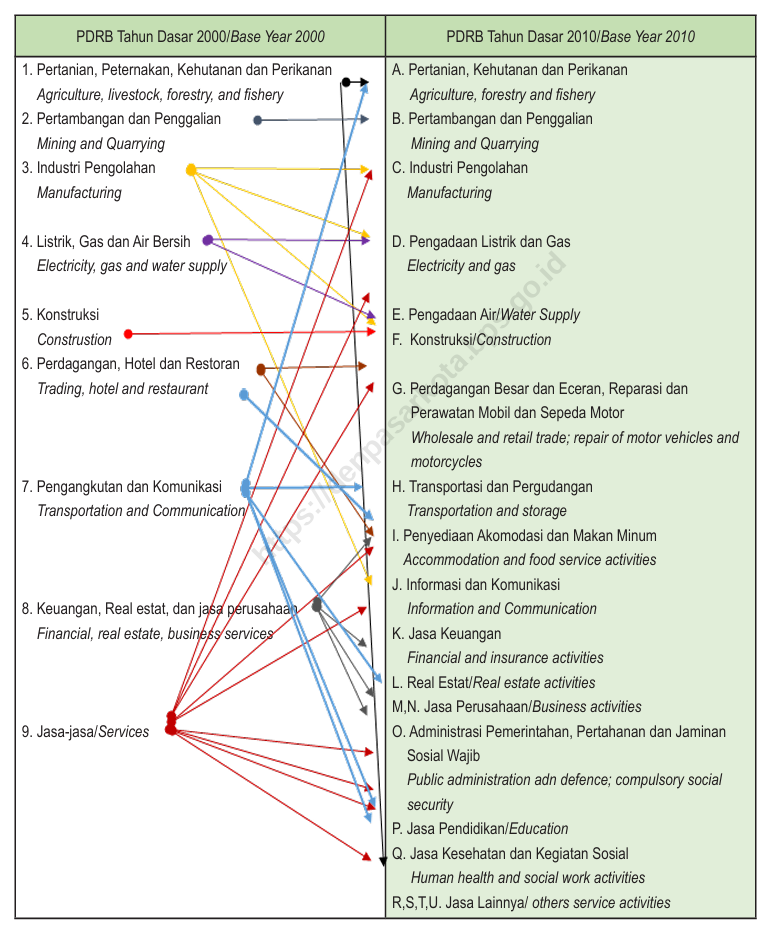

In [2]:
# Tentukan keywords dari masing-masing lapangan usaha
key_sektor = ['pendidikan','biaya pendidikan','spp']

keywords_scrap = key_sektor

# Tentukan rentang tanggal
start_date = datetime.date(2024, 10, 1)
end_date = datetime.date(2024, 11, 12)

# **SCRAPPING, PRE-CLEANING, & EXPORT (Scrapping BaliPost Lama)**

## 1. BaliPost

Fungsi dan package untuk scrapping di balipost ada pada kode di chunk berikut \
Aktifkan kalau pencarian di balipost sudah berjalan normal (saat kode ini dibuat sangat lambat)

In [3]:
# import requests
# from bs4 import BeautifulSoup
# import datetime
# import pandas as pd

# # Fungsi untuk melakukan scraping dari BaliPost
# def scrape_balipost(keyword, start_date, end_date, max_results, max_pages):
#     """
#     Fungsi untuk melakukan scraping artikel dari situs BaliPost berdasarkan keyword dan rentang tanggal.

#     Args:
#     - keyword (str): Keyword pencarian.
#     - start_date (datetime.date): Tanggal awal.
#     - end_date (datetime.date): Tanggal akhir.
#     - max_results (int): Maksimum jumlah artikel yang diambil.
#     - max_pages (int): Maksimum jumlah halaman yang diambil.

#     Returns:
#     - results (list): Daftar artikel yang berisi judul, link, tanggal, keyword, dan isi.
#     """
#     results = []

#     # Mengganti spasi dengan tanda "+" untuk keyword yang lebih dari satu kata
#     search_keyword = keyword.replace(" ", "+")
#     base_url = f"https://www.balipost.com/search/{search_keyword}"
#     current_page = 1

#     while len(results) < max_results and current_page <= max_pages:
#         url = f"{base_url}/page/{current_page}" if current_page > 1 else base_url
#         print(f"Scraping halaman {current_page} dari URL: {url}")
#         response = requests.get(url)

#         if response.status_code != 200:
#             print(f"Error saat mengakses halaman {current_page}. Status code: {response.status_code}")
#             break

#         soup = BeautifulSoup(response.content, "html.parser")
#         articles = soup.find_all("div", class_="td_module_10 td_module_wrap td-animation-stack")

#         if not articles:
#             print(f"Tidak ada artikel di halaman {current_page}, berhenti scraping.")
#             break

#         for article in articles:
#             title_element = article.find("h3", class_="entry-title td-module-title")
#             if title_element:
#                 title = title_element.text.strip()
#                 link = article.find("a")["href"]

#                 date_element = article.find("time", class_="entry-date updated td-module-date")
#                 if date_element:
#                     date_str = date_element["datetime"][:10]
#                     date = datetime.datetime.strptime(date_str, "%Y-%m-%d").date()

#                     # Cek apakah tanggal artikel dalam rentang yang diinginkan
#                     if not (start_date <= date <= end_date):
#                         continue

#                 content_element = article.find("div", class_="td-excerpt")
#                 content = content_element.text.strip() if content_element else ""

#                 results.append({"title": title, "keyword": keyword, "source": "BaliPost", "link": link, "date": date, "content": content})
#                 if len(results) >= max_results:
#                     break

#         pagination = soup.find("a", class_="page", title=str(current_page + 1))
#         if pagination:
#             current_page += 1
#         else:
#             break

#     return results


Memulai proses scrapping berita

In [4]:
# # Step 4: Scraping untuk setiap keyword
# # Takes a LOOOOOOOOOOOONG time

# all_news = []

# for keyword in keywords_scrap:
#     print(f"\nMemulai scraping untuk keyword: {keyword}")
#     news = scrape_balipost(keyword, start_date, end_date, max_results=25, max_pages=3)

#     # Tampilkan jumlah artikel yang berhasil diekstrak untuk keyword ini
#     num_articles = len(news)
#     print(f"Jumlah artikel yang diekstrak untuk keyword '{keyword}': {num_articles}")

#     all_news.extend(news)

# # Step 5: Simpan hasil ke dalam file Excel
# berita_balipost = pd.DataFrame(all_news)
# berita_balipost

In [5]:
# # Import melalui kode ini kalau sudah ada raw data scrapping BaliPost yang terpisah dari proses scrapping diatas (hanya untuk BaliPost)
# berita_balipost = pd.read_excel("C:/Users/asus/OneDrive/BPS/Neraca/berita_sektor15_triwulan4_bali.xlsx")
# berita_balipost

Pre-cleaning \
Hasil Scrapping BaliPost harus difilter terlebih dahulu wilayah (dari isi konten) dan judulnya (kadang tidak sesuai dengan kata yang diinginkan) \
Contoh: Kata kunci --> Ikan || Judul ditemukan --> DicarIKAN, DijanjIKAN

In [6]:
# # Keyword to filter out
# keywords_filter = ["TABANAN","SINGARAJA","DENPASAR","MANGUPURA","AMLAPURA","SEMARAPURA","NEGARA","GIANYAR","BANGLI"]

# # Build the condition for multiple keywords
# pattern = '|'.join(keywords_filter)  # Create a pattern that matches any of the keywords

# # Filter out rows where 'Description' contains the keyword
# berita_balipost_2 = pd.DataFrame(berita_balipost[berita_balipost['content'].str.contains(pattern, case=False, na=False)])

# # Show the filtered DataFrame
# print(berita_balipost_2.shape)
# berita_balipost_2

In [7]:
# # Build the regular expression pattern with word boundaries
# pattern_1 = r'\b(' + '|'.join(keywords_scrap) + r')\b'  # Ensures "Ikan" is a whole word

# # Filter rows where 'Title' contains the keyword as a whole word (case insensitive)
# berita_balipost_3 = berita_balipost_2[berita_balipost_2['title'].str.contains(pattern_1, case=False, na=False)]

# # Show the filtered DataFrame
# print(berita_balipost_3.shape)
# berita_balipost_3

In [8]:
# # Remove Duplication
# berita_balipost_3 = berita_balipost_3.drop_duplicates(subset='title', keep='first')
# print(berita_balipost_3.shape)
# berita_balipost_3

## 2. DetikBali

In [9]:
import math
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

# Define web scraping functions
# Fungsi untuk menuju ke portal berita
def search_url(query, date_start, date_end, pages_num=1):
    url = f"https://www.detik.com/search/searchnews?query={query}&siteid=123&sortby=time&fromdatex={date_start}&todatex={date_end}&page={pages_num}&result_type=relevansi"
    
    print(url)
    response = requests.get(url)
    page = bs(response.content, "html.parser")

    return page

# Fungsi untuk menghitung jumlah artikel di halaman terakhir
def last_page_article_count(query, date_start, date_end, page_num):
    last_page = search_url(query, date_start, date_end, page_num)
    article_list = last_page.find("div", {"class": "list-content"})

    if article_list:
        articles = article_list.find_all('article', class_='list-content__item')           
    article_count = len(articles)
    
    return article_count

def news_search_results(query, date_start, date_end):
    page = search_url(query, date_start, date_end)
    
    pagination = page.find("div", {"class": "pagination"})
    if pagination:
        page_numbers = pagination.find_all('a', class_='pagination__item')
        if page_numbers:
            last_page_number = int(page_numbers[-2].text)

        # Menghitung jumlah artikel di halaman terakhir
        last_page_articles = last_page_article_count(query, date_start, date_end, last_page_number)

        # Menghitung jumlah artikel yang diperoleh
        num = (last_page_number - 1) * 10 + last_page_articles
    else:
        num = 0
        last_page_number = 1
    
    return num, last_page_number

# Fungsi untuk mendapatkan isi konten
def news_get_content(article_url):
    response = requests.get(article_url)
    content_page = bs(response.content, "html.parser")

    content_list = []
    multiple_page = content_page.find("div", {"class": "detail__multiple"})
    if multiple_page:
        multiple_page = [x.get("href") for x in multiple_page.find_all("a")][:-1]
        for page in multiple_page:
            response = requests.get(page)
            content_page = bs(response.content, "html.parser")
            content_list.extend([p.get_text() for p in content_page.find_all("p") if not p.get_text().startswith('\n\n\n\nHalaman\n\n') and
                                p.get_text() not in ['',
                                                    '[Gambas:Instagram]',
                                                    '[Gambas:Video 20detik]',
                                                    '\r\nADVERTISEMENT\r\n',
                                                    '\r\n    ADVERTISEMENT\r\n',
                                                    '\r\n    ADVERTISEMENT\r\n  ',
                                                    '\r\n   ADVERTISEMENT\r\n  ',
                                                    '\r\n   ADVERTISEMENT\r\n',
                                                    '\r\n        SCROLL TO RESUME CONTENT\r\n  ',
                                                    'Selengkapnya di halaman selanjutnya.',
                                                    '\n\t\t\t\t\tAyo share cerita pengalaman dan upload photo album travelingmu di sini.\n\n\t\t\t\t\t\t\t\t\t\t\tSilakan Daftar atau Masuk\n']])
    else:
        content_list.extend([p.get_text() for p in content_page.find_all("p")
                            if p.get_text() not in ['',
                                                    '[Gambas:Instagram]',
                                                    '[Gambas:Video 20detik]',
                                                    '\r\nADVERTISEMENT\r\n',
                                                    '\r\n    ADVERTISEMENT\r\n',
                                                    '\r\n    ADVERTISEMENT\r\n  ',
                                                    '\r\n   ADVERTISEMENT\r\n  ',
                                                    '\r\n   ADVERTISEMENT\r\n',
                                                    '\r\n        SCROLL TO RESUME CONTENT\r\n  ',
                                                    '\n\t\t\t\t\tAyo share cerita pengalaman dan upload photo album travelingmu di sini.\n\n\t\t\t\t\t\t\t\t\t\t\tSilakan Daftar atau Masuk\n']])

    content_list = '\n\n'.join(content_list)

    return content_list

# Fungsi untuk mengecek berita yang merupakan advertorial
def news_advertorial_check(article_url):
    response = requests.get(article_url)
    content_page = bs(response.content, "html.parser")

    author = content_page.find("meta", {"content": "Advertorial"})

    return bool(author)

# Fungsi untuk mencari artikel dengan output adalah jumlah artikel dan halaman terakhir
def search_articles(query, from_date, to_date, ads_article, article_content):
    results_num, last_page = news_search_results(query, from_date, to_date)
        
    print(f"Result num: {results_num}")
    print(f"Last page: {last_page}")

    return results_num, last_page

# Fungsi untuk memperoleh list artikel
def articles_list(query, from_date, to_date, ads_article, article_content, num_articles, last_page):
    article_lists = []
    pages = math.ceil(num_articles / 10)
    
    print("\nMemulai Scrapping dari DetikBali untuk keyword:", query)
    for i in range(1, pages + 1):
        print("Scrapping halaman", i, "dari URL: ")
        page = search_url(query, from_date, to_date, i)
        articles = page.find_all("article", class_="list-content__item")

        for article in articles:
            title = article.find("a", {"class": "media__link"}).get('dtr-ttl')
            category = article.find('h2', class_='media__subtitle').text.strip()
            publish_date = article.find('span', title=True).get('title')
            article_url = article.find("a", {"class": "media__link"}).get('href')
                
            # print(f"Title: {title}")
            # print(f"Category: {category}")
            # print(f"Publish Date: {publish_date}")
            # print(f"Article URL: {article_url}")

            if ads_article and news_advertorial_check(article_url):
                continue
            else:
                if article_content:
                    content = news_get_content(article_url)
                    if (
                        any(title in existing_article["title"] for existing_article in article_lists) or 
                        any(content in existing_article["content"] for existing_article in article_lists)
                    ):
                        continue
                    else:
                        article_lists.append({
                            "title": title,
                            "keyword": query,
                            "source": category,
                            "link": article_url,
                            "date": publish_date,
                            "content": content
                        })
                else:
                    if any(title in existing_article["title"] for existing_article in article_lists):
                        continue
                    else:
                        article_lists.append({
                            "title": title,
                            "keyword": query,
                            "link": article_url,
                            "date": publish_date
                        })
            if len(article_lists) == num_articles:
                break
        if len(article_lists) == num_articles:
            break
            
    print(f"Jumlah artikel dengan kata kunci {keyword}: {len(article_lists)} artikel.")
    data = article_lists
    return data

In [10]:
# Scraping untuk setiap keyword
all_news_detik = []

for keyword in keywords_scrap:
    search_keyword = keyword.replace(" ", "+")
    news = articles_list(search_keyword, start_date.strftime('%d/%m/%Y'), end_date.strftime('%d/%m/%Y'), False, True, 25, 5)
    all_news_detik.extend(news)

# Simpan hasil ke dalam file Excel
berita_detik = pd.DataFrame(all_news_detik) 
berita_detik


Memulai Scrapping dari DetikBali untuk keyword: pendidikan
Scrapping halaman 1 dari URL: 
https://www.detik.com/search/searchnews?query=pendidikan&siteid=123&sortby=time&fromdatex=01/10/2024&todatex=12/11/2024&page=1&result_type=relevansi
Scrapping halaman 2 dari URL: 
https://www.detik.com/search/searchnews?query=pendidikan&siteid=123&sortby=time&fromdatex=01/10/2024&todatex=12/11/2024&page=2&result_type=relevansi
Scrapping halaman 3 dari URL: 
https://www.detik.com/search/searchnews?query=pendidikan&siteid=123&sortby=time&fromdatex=01/10/2024&todatex=12/11/2024&page=3&result_type=relevansi
Jumlah artikel dengan kata kunci pendidikan: 25 artikel.

Memulai Scrapping dari DetikBali untuk keyword: biaya+pendidikan
Scrapping halaman 1 dari URL: 
https://www.detik.com/search/searchnews?query=biaya+pendidikan&siteid=123&sortby=time&fromdatex=01/10/2024&todatex=12/11/2024&page=1&result_type=relevansi
Scrapping halaman 2 dari URL: 
https://www.detik.com/search/searchnews?query=biaya+pendidik

,title,keyword,source,link,date,content
0,Diar Tawarkan Pasraman Singkat untuk Pendidika...,pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7624095/d...,"Selasa, 05 Nov 2024 19:49 WIB",Calon wakil bupati (cawabup) Bangli nomor urut...
1,George-Walde Janjikan Digitalisasi Pendidikan ...,pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7619320/g...,"Sabtu, 02 Nov 2024 20:44 WIB",Calon wali kota (cawalkot) Kupang nomor urut 3...
2,Winuntara: Sistem Pendidikan Bangli Era Sedana...,pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7624133/w...,"Selasa, 05 Nov 2024 20:29 WIB",Calon wakil bupati (cawabup) Bangli nomor urut...
3,Seluruh Sekolah di Flores Timur Harus Terima S...,pendidikan,detikBali,https://www.detik.com/bali/nusra/d-7635203/sel...,"Selasa, 12 Nov 2024 18:06 WIB",Pemerintah Flores Timur memastikan anak-anak p...
4,Telkomsel Perluas Jaringan Telekomunikasi di P...,pendidikan,detikBali,https://www.detik.com/bali/bisnis/d-7635597/te...,"Selasa, 12 Nov 2024 23:45 WIB",Telkomsel kembali perluas jaringan telekomunik...
5,Guru SMP Hamili Istri Orang Diperiksa Dinas Pe...,pendidikan,detikBali,https://www.detik.com/bali/nusra/d-7576252/gur...,"Senin, 07 Okt 2024 15:24 WIB","Guru SMP di Kecamatan Ile Ape, Lembata, Nusa T..."
6,"Kampanye di Klungkung, Koster-Giri Janjikan Ke...",pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7576263/k...,"Senin, 07 Okt 2024 15:31 WIB",Calon gubernur dan wakil gubernur Bali nomor u...
7,Disdikpora Denpasar Siap Ajarkan Mata Pelajara...,pendidikan,detikBali,https://www.detik.com/bali/berita/d-7634612/di...,"Selasa, 12 Nov 2024 13:38 WIB","Dinas Pendidikan, Kepemudaan dan Olahraga (Dis..."
8,"Bangun Nasionalisme Anak Muda, Subrata Ingatka...",pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7624142/b...,"Selasa, 05 Nov 2024 20:39 WIB",Calon wakil bupati (cawabup) Bangli nomor urut...
9,Sugawa Akan Kaji Hak Atas Potensi Gas Bumi Blo...,pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7635369/s...,"Selasa, 12 Nov 2024 19:27 WIB",Pasangan calon (paslon) nomor urut 1 Nyoman Su...


Pre-cleaning

In [11]:
# Filter Wilayah
keywords_filter = ["Tabanan","Singaraja","Denpasar","Badung","Karangasem","Klungkung","Jembrana","Gianyar","Bangli"]

# Build the condition for multiple keywords
pattern = '|'.join(keywords_filter)  # Create a pattern that matches any of the keywords

# Filter out rows where 'Description' contains the keyword
berita_detik_2 = pd.DataFrame(berita_detik[berita_detik['content'].str.contains(pattern, case=False, na=False)])

# Show the filtered DataFrame
print(berita_detik_2.shape)
berita_detik_2

(27, 6)


,title,keyword,source,link,date,content
0,Diar Tawarkan Pasraman Singkat untuk Pendidika...,pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7624095/d...,"Selasa, 05 Nov 2024 19:49 WIB",Calon wakil bupati (cawabup) Bangli nomor urut...
2,Winuntara: Sistem Pendidikan Bangli Era Sedana...,pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7624133/w...,"Selasa, 05 Nov 2024 20:29 WIB",Calon wakil bupati (cawabup) Bangli nomor urut...
6,"Kampanye di Klungkung, Koster-Giri Janjikan Ke...",pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7576263/k...,"Senin, 07 Okt 2024 15:31 WIB",Calon gubernur dan wakil gubernur Bali nomor u...
7,Disdikpora Denpasar Siap Ajarkan Mata Pelajara...,pendidikan,detikBali,https://www.detik.com/bali/berita/d-7634612/di...,"Selasa, 12 Nov 2024 13:38 WIB","Dinas Pendidikan, Kepemudaan dan Olahraga (Dis..."
8,"Bangun Nasionalisme Anak Muda, Subrata Ingatka...",pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7624142/b...,"Selasa, 05 Nov 2024 20:39 WIB",Calon wakil bupati (cawabup) Bangli nomor urut...
10,Tamba-Dana Janji Beri Pendidikan-Pelatihan bag...,pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7607924/t...,"Sabtu, 26 Okt 2024 19:35 WIB","Pasangan calon (paslon) nomor urut 1, I Nengah..."
14,Raden Cahyo Tawarkan Program Pendidikan Gratis...,pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7604982/r...,"Kamis, 24 Okt 2024 19:14 WIB","Calon bupati Bangli nomor urut 1, Raden Cahyo ..."
16,"Bang-Ipat Akan Naikkan Beasiswa, 1 Keluarga 1 ...",pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7607912/b...,"Sabtu, 26 Okt 2024 19:14 WIB",Pasangan calon (paslon) bupati dan wakil bupat...
17,Sugawa Akan Libatkan Ahli untuk Grand Design S...,pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7603459/s...,"Rabu, 23 Okt 2024 21:29 WIB","Calon bupati (cabup) Buleleng nomor urut 1, Ny..."
19,Kesiapan Bali Jelang Program Makan Bergizi Gratis,pendidikan,detikBali,https://www.detik.com/bali/berita/d-7634008/ke...,"Selasa, 12 Nov 2024 07:41 WIB",Pemerintah daerah (pemda) di Bali telah memper...


In [12]:
# Build the regular expression pattern with word boundaries
pattern = r'\b(' + '|'.join(keywords_scrap) + r')\b'

# Filter rows where 'Title' contains the keyword as a whole word (case insensitive)
berita_detik_3 = berita_detik_2[berita_detik_2['title'].str.contains(pattern, case=False, na=False)]

# Show the filtered DataFrame
print(berita_detik_3.shape)
berita_detik_3

(11, 6)


C:\Users\asus\AppData\Local\Temp\ipykernel_21016\1307647291.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  berita_detik_3 = berita_detik_2[berita_detik_2['title'].str.contains(pattern, case=False, na=False)]


,title,keyword,source,link,date,content
0,Diar Tawarkan Pasraman Singkat untuk Pendidika...,pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7624095/d...,"Selasa, 05 Nov 2024 19:49 WIB",Calon wakil bupati (cawabup) Bangli nomor urut...
2,Winuntara: Sistem Pendidikan Bangli Era Sedana...,pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7624133/w...,"Selasa, 05 Nov 2024 20:29 WIB",Calon wakil bupati (cawabup) Bangli nomor urut...
6,"Kampanye di Klungkung, Koster-Giri Janjikan Ke...",pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7576263/k...,"Senin, 07 Okt 2024 15:31 WIB",Calon gubernur dan wakil gubernur Bali nomor u...
10,Tamba-Dana Janji Beri Pendidikan-Pelatihan bag...,pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7607924/t...,"Sabtu, 26 Okt 2024 19:35 WIB","Pasangan calon (paslon) nomor urut 1, I Nengah..."
14,Raden Cahyo Tawarkan Program Pendidikan Gratis...,pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7604982/r...,"Kamis, 24 Okt 2024 19:14 WIB","Calon bupati Bangli nomor urut 1, Raden Cahyo ..."
17,Sugawa Akan Libatkan Ahli untuk Grand Design S...,pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7603459/s...,"Rabu, 23 Okt 2024 21:29 WIB","Calon bupati (cabup) Buleleng nomor urut 1, Ny..."
27,Diar Tawarkan Pasraman Singkat untuk Pendidika...,biaya+pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7624095/d...,"Selasa, 05 Nov 2024 19:49 WIB",Calon wakil bupati (cawabup) Bangli nomor urut...
33,Winuntara: Sistem Pendidikan Bangli Era Sedana...,biaya+pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7624133/w...,"Selasa, 05 Nov 2024 20:29 WIB",Calon wakil bupati (cawabup) Bangli nomor urut...
41,"Kampanye di Klungkung, Koster-Giri Janjikan Ke...",biaya+pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7576263/k...,"Senin, 07 Okt 2024 15:31 WIB",Calon gubernur dan wakil gubernur Bali nomor u...
44,Tamba-Dana Janji Beri Pendidikan-Pelatihan bag...,biaya+pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7607924/t...,"Sabtu, 26 Okt 2024 19:35 WIB","Pasangan calon (paslon) nomor urut 1, I Nengah..."


Menghapus berita yang duplikat

In [13]:
# Remove Duplication
berita_detik_4 = berita_detik_3.drop_duplicates(subset='title', keep='first')
print(berita_detik_4.shape)
berita_detik_4

(6, 6)


,title,keyword,source,link,date,content
0,Diar Tawarkan Pasraman Singkat untuk Pendidika...,pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7624095/d...,"Selasa, 05 Nov 2024 19:49 WIB",Calon wakil bupati (cawabup) Bangli nomor urut...
2,Winuntara: Sistem Pendidikan Bangli Era Sedana...,pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7624133/w...,"Selasa, 05 Nov 2024 20:29 WIB",Calon wakil bupati (cawabup) Bangli nomor urut...
6,"Kampanye di Klungkung, Koster-Giri Janjikan Ke...",pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7576263/k...,"Senin, 07 Okt 2024 15:31 WIB",Calon gubernur dan wakil gubernur Bali nomor u...
10,Tamba-Dana Janji Beri Pendidikan-Pelatihan bag...,pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7607924/t...,"Sabtu, 26 Okt 2024 19:35 WIB","Pasangan calon (paslon) nomor urut 1, I Nengah..."
14,Raden Cahyo Tawarkan Program Pendidikan Gratis...,pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7604982/r...,"Kamis, 24 Okt 2024 19:14 WIB","Calon bupati Bangli nomor urut 1, Raden Cahyo ..."
17,Sugawa Akan Libatkan Ahli untuk Grand Design S...,pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7603459/s...,"Rabu, 23 Okt 2024 21:29 WIB","Calon bupati (cabup) Buleleng nomor urut 1, Ny..."


## 3. RadarBali

In [14]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import time
from datetime import datetime

# Tanggal batas yang ingin dibandingkan
start_date = datetime(2024, 10, 1)  # 1 Oktober 2024
end_date = datetime(2024, 12, 31)  # 31 Desember 2024

# Inisialisasi driver Chrome tanpa mengunduh chromedriver secara manual
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)
# Fungsi untuk melakukan scraping dan mengambil isian kelas latest__subtitle, latest__link, dan latest__date
def get_news(query, start_page, end_page):
    results = []

    print("\nMemulai scrapping RadarBali untuk keyword:", query)
    for page in range(start_page, end_page + 1):
        url = f"https://radarbali.jawapos.com/search?q={query}&sort=latest&page={page}"
        print("Scrapping halaman",page,"dari URL:",url)
        driver.get(url)
        time.sleep(10)  # Tunggu beberapa detik agar halaman selesai dimuat

        # Ambil konten halaman dan buat objek BeautifulSoup
        soup = BeautifulSoup(driver.page_source, "html.parser")

        # Ambil semua elemen dengan class latest__item
        articles = soup.find_all('div', class_='latest__item')

        # Ambil informasi dari setiap artikel
        for article in articles:
            subtitle = article.find('h4', class_='latest__subtitle')
            title = article.find('a', class_='latest__link')
            link = article.find('a', class_='latest__link')['href']
            date = article.find('date', class_='latest__date')

            # Menampilkan hasil jika elemen ditemukan, filter tanggal sesuai yang diinginkan
            if subtitle and title and date:
                date_berita = date.get_text(strip=True)

                # Fungsi untuk mengonversi nama bulan menjadi angka bulan
                def get_month_number(month_name):
                    months = {
                        "Januari": 1,
                        "Februari": 2,
                        "Maret": 3,
                        "April": 4,
                        "Mei": 5,
                        "Juni": 6,
                        "Juli": 7,
                        "Agustus": 8,
                        "September": 9,
                        "Oktober": 10,
                        "November": 11,
                        "Desember": 12
                    }
                    return months.get(month_name)

                # Fungsi untuk mem-parsing tanggal dalam format yang diberikan
                def parse_date(date_str):
                    # Pisahkan hari dan waktu
                    day_part, time_part = date_str.split(" | ")

                    # Ambil tanggal dan bulan dari bagian day_part
                    day_name, day, month_name, year = day_part.split()
                    day = int(day)
                    year = int(year)
                    month = get_month_number(month_name)
                    
                    # Gabungkan menjadi format yang bisa diproses oleh datetime
                    # Format waktu seperti '21:46 WIB', jadi kita hanya perlu ambil jam dan menit
                    time = time_part.replace(" WIB", "")

                    # Gabungkan semuanya ke format yang sesuai dengan datetime
                    date_string = f"{year}-{month:02d}-{day:02d} {time}"

                    # Mengonversi ke objek datetime
                    return datetime.strptime(date_string, "%Y-%m-%d %H:%M")
            
                parsed_date = parse_date(date_berita)

                # Membandingkan apakah parsed_date berada dalam rentang 1 Oktober 2024 sampai 31 Desember 2024
                if start_date <= parsed_date <= end_date:
                    results.append({"title": title.get_text(strip=True), "keyword": query, "source": "RadarBali", "link": link, "date": date.get_text(strip=True), "content": subtitle.get_text(strip=True)})
                    # print("Subtitle:", subtitle.get_text(strip=True))
                    # print("Title:", title.get_text(strip=True))
                    # print("Link:", link)
                    # print("Date:", date.get_text(strip=True))
                    # print('-' * 80)
                else:
                    break

    return results

import pandas as pd

all_news_radarbali = []

for keyword in keywords_scrap:
    search_keyword = keyword.replace(" ", "+")
    news = get_news(search_keyword, start_page=1, end_page=5)

    # Tampilkan jumlah artikel yang berhasil diekstrak untuk keyword ini
    num_articles = len(news)
    print(f"Jumlah artikel yang diekstrak untuk keyword '{keyword}': {num_articles}")

    all_news_radarbali.extend(news)

driver.quit()


Memulai scrapping RadarBali untuk keyword: pendidikan
Scrapping halaman 1 dari URL: https://radarbali.jawapos.com/search?q=pendidikan&sort=latest&page=1
Scrapping halaman 2 dari URL: https://radarbali.jawapos.com/search?q=pendidikan&sort=latest&page=2
Scrapping halaman 3 dari URL: https://radarbali.jawapos.com/search?q=pendidikan&sort=latest&page=3
Scrapping halaman 4 dari URL: https://radarbali.jawapos.com/search?q=pendidikan&sort=latest&page=4
Scrapping halaman 5 dari URL: https://radarbali.jawapos.com/search?q=pendidikan&sort=latest&page=5
Jumlah artikel yang diekstrak untuk keyword 'pendidikan': 27

Memulai scrapping RadarBali untuk keyword: biaya+pendidikan
Scrapping halaman 1 dari URL: https://radarbali.jawapos.com/search?q=biaya+pendidikan&sort=latest&page=1
Scrapping halaman 2 dari URL: https://radarbali.jawapos.com/search?q=biaya+pendidikan&sort=latest&page=2
Scrapping halaman 3 dari URL: https://radarbali.jawapos.com/search?q=biaya+pendidikan&sort=latest&page=3
Scrapping hal

In [15]:
berita_radarbali = pd.DataFrame(all_news_radarbali)
berita_radarbali

,title,keyword,source,link,date,content
0,Disdikpora Jembrana Kaji Larangan Liburan Kelu...,pendidikan,RadarBali,https://radarbali.jawapos.com/jembrana/7053107...,"Kamis, 14 November 2024 | 12:35 WIB",Jembrana
1,Kuatkan Ekosistem Digital untuk Pendidikan Ber...,pendidikan,RadarBali,https://radarbali.jawapos.com/teknologi/705292...,"Sabtu, 9 November 2024 | 09:20 WIB",Teknologi
2,"Teken Nota Kesepahaman, KEK Kura Kura Bali – U...",pendidikan,RadarBali,https://radarbali.jawapos.com/pariwisata/70528...,"Jumat, 8 November 2024 | 06:43 WIB",Pariwisata
3,"Pro Kontra Guru Cukur Rambut Murid, Ini Pandan...",pendidikan,RadarBali,https://radarbali.jawapos.com/pendidikan/70528...,"Kamis, 7 November 2024 | 20:53 WIB",Pendidikan
4,Koster-Giri Hadiri Uji Publik didepan 1300 Mah...,pendidikan,RadarBali,https://radarbali.jawapos.com/politika/7052833...,"Rabu, 6 November 2024 | 20:19 WIB",Politika
5,Wajib Tahu! Ini Lima Program Jitu Pendidikan y...,pendidikan,RadarBali,https://radarbali.jawapos.com/politika/7052776...,"Selasa, 5 November 2024 | 14:21 WIB",Politika
6,"Perkuat Kolaborasi, MOE Taiwan Gelar Pertemuan...",pendidikan,RadarBali,https://radarbali.jawapos.com/pendidikan/70527...,"Selasa, 5 November 2024 | 10:40 WIB",Pendidikan
7,Koster-Giri akan Bantu Bangun Sekolah dan Perp...,pendidikan,RadarBali,https://radarbali.jawapos.com/politika/7052680...,"Sabtu, 2 November 2024 | 18:08 WIB",Politika
8,Bahana Widya Mahardika (4): Program Doktor Des...,pendidikan,RadarBali,https://radarbali.jawapos.com/pendidikan/70524...,"Selasa, 29 Oktober 2024 | 08:24 WIB",Pendidikan
9,"Tingkatkan Pendidikan, Gus Par-Pandu Cetak Sat...",pendidikan,RadarBali,https://radarbali.jawapos.com/politika/7052434...,"Minggu, 27 Oktober 2024 | 16:39 WIB",Politika


In [16]:
# Remove Duplication
berita_radarbali_2 = berita_radarbali.drop_duplicates(subset='title', keep='first')
print(berita_radarbali_2.shape)
berita_radarbali_2

(29, 6)


,title,keyword,source,link,date,content
0,Disdikpora Jembrana Kaji Larangan Liburan Kelu...,pendidikan,RadarBali,https://radarbali.jawapos.com/jembrana/7053107...,"Kamis, 14 November 2024 | 12:35 WIB",Jembrana
1,Kuatkan Ekosistem Digital untuk Pendidikan Ber...,pendidikan,RadarBali,https://radarbali.jawapos.com/teknologi/705292...,"Sabtu, 9 November 2024 | 09:20 WIB",Teknologi
2,"Teken Nota Kesepahaman, KEK Kura Kura Bali – U...",pendidikan,RadarBali,https://radarbali.jawapos.com/pariwisata/70528...,"Jumat, 8 November 2024 | 06:43 WIB",Pariwisata
3,"Pro Kontra Guru Cukur Rambut Murid, Ini Pandan...",pendidikan,RadarBali,https://radarbali.jawapos.com/pendidikan/70528...,"Kamis, 7 November 2024 | 20:53 WIB",Pendidikan
4,Koster-Giri Hadiri Uji Publik didepan 1300 Mah...,pendidikan,RadarBali,https://radarbali.jawapos.com/politika/7052833...,"Rabu, 6 November 2024 | 20:19 WIB",Politika
5,Wajib Tahu! Ini Lima Program Jitu Pendidikan y...,pendidikan,RadarBali,https://radarbali.jawapos.com/politika/7052776...,"Selasa, 5 November 2024 | 14:21 WIB",Politika
6,"Perkuat Kolaborasi, MOE Taiwan Gelar Pertemuan...",pendidikan,RadarBali,https://radarbali.jawapos.com/pendidikan/70527...,"Selasa, 5 November 2024 | 10:40 WIB",Pendidikan
7,Koster-Giri akan Bantu Bangun Sekolah dan Perp...,pendidikan,RadarBali,https://radarbali.jawapos.com/politika/7052680...,"Sabtu, 2 November 2024 | 18:08 WIB",Politika
8,Bahana Widya Mahardika (4): Program Doktor Des...,pendidikan,RadarBali,https://radarbali.jawapos.com/pendidikan/70524...,"Selasa, 29 Oktober 2024 | 08:24 WIB",Pendidikan
9,"Tingkatkan Pendidikan, Gus Par-Pandu Cetak Sat...",pendidikan,RadarBali,https://radarbali.jawapos.com/politika/7052434...,"Minggu, 27 Oktober 2024 | 16:39 WIB",Politika


In [17]:
# Build the regular expression pattern with word boundaries
pattern = r'\b(' + '|'.join(keywords_scrap) + r')\b'

# Filter rows where 'Title' contains the keyword as a whole word (case insensitive)
berita_radarbali_3 = berita_radarbali_2.copy()
berita_radarbali_3 = berita_radarbali_2[berita_radarbali_2['title'].str.contains(pattern, case=False, na=False)]

# Show the filtered DataFrame
print(berita_radarbali_3.shape)
berita_radarbali_3

(14, 6)


C:\Users\asus\AppData\Local\Temp\ipykernel_21016\2112746010.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  berita_radarbali_3 = berita_radarbali_2[berita_radarbali_2['title'].str.contains(pattern, case=False, na=False)]


,title,keyword,source,link,date,content
1,Kuatkan Ekosistem Digital untuk Pendidikan Ber...,pendidikan,RadarBali,https://radarbali.jawapos.com/teknologi/705292...,"Sabtu, 9 November 2024 | 09:20 WIB",Teknologi
3,"Pro Kontra Guru Cukur Rambut Murid, Ini Pandan...",pendidikan,RadarBali,https://radarbali.jawapos.com/pendidikan/70528...,"Kamis, 7 November 2024 | 20:53 WIB",Pendidikan
5,Wajib Tahu! Ini Lima Program Jitu Pendidikan y...,pendidikan,RadarBali,https://radarbali.jawapos.com/politika/7052776...,"Selasa, 5 November 2024 | 14:21 WIB",Politika
9,"Tingkatkan Pendidikan, Gus Par-Pandu Cetak Sat...",pendidikan,RadarBali,https://radarbali.jawapos.com/politika/7052434...,"Minggu, 27 Oktober 2024 | 16:39 WIB",Politika
10,"Miles for Smiles’ Charity Fun Run, Mamaka by O...",pendidikan,RadarBali,https://radarbali.jawapos.com/berita-daerah/70...,"Minggu, 27 Oktober 2024 | 08:37 WIB",Berita Daerah
11,Telkomsel Lebih Dekat dengan Gen Z melalui by....,pendidikan,RadarBali,https://radarbali.jawapos.com/gaya-hidup/70523...,"Kamis, 24 Oktober 2024 | 17:49 WIB",Gaya Hidup
15,Suyadinata Disambut Antusias di Banjar Adat Be...,pendidikan,RadarBali,https://radarbali.jawapos.com/politika/7052134...,"Sabtu, 19 Oktober 2024 | 07:42 WIB",Politika
16,Koster-Giri akan Bangun Sports Center Bali di ...,pendidikan,RadarBali,https://radarbali.jawapos.com/politika/7051949...,"Senin, 14 Oktober 2024 | 15:00 WIB",Politika
18,Buntut Konflik Dua Yayasan Pendidikan di Taban...,pendidikan,RadarBali,https://radarbali.jawapos.com/tabanan/70518197...,"Kamis, 10 Oktober 2024 | 18:05 WIB",Tabanan
19,"Badung Education Fair 2024, Pj. Sekda Badung: ...",pendidikan,RadarBali,https://radarbali.jawapos.com/badung/705174324...,"Selasa, 8 Oktober 2024 | 17:50 WIB",Badung


In [18]:
berita_radarbali_4 = berita_radarbali_3.copy()

# Nilai yang ingin kita hapus
values_to_remove = ['Sportmania','Foto Mania','Berita Daerah']
columns_to_check = ['content']

# Hapus baris yang memiliki nilai tersebut di sembarang kolom
berita_radarbali_4 = berita_radarbali_4[~berita_radarbali_4[columns_to_check].apply(lambda row: row.isin(values_to_remove).any(), axis=1)]
print(berita_radarbali_4.shape)
berita_radarbali_4


(13, 6)


,title,keyword,source,link,date,content
1,Kuatkan Ekosistem Digital untuk Pendidikan Ber...,pendidikan,RadarBali,https://radarbali.jawapos.com/teknologi/705292...,"Sabtu, 9 November 2024 | 09:20 WIB",Teknologi
3,"Pro Kontra Guru Cukur Rambut Murid, Ini Pandan...",pendidikan,RadarBali,https://radarbali.jawapos.com/pendidikan/70528...,"Kamis, 7 November 2024 | 20:53 WIB",Pendidikan
5,Wajib Tahu! Ini Lima Program Jitu Pendidikan y...,pendidikan,RadarBali,https://radarbali.jawapos.com/politika/7052776...,"Selasa, 5 November 2024 | 14:21 WIB",Politika
9,"Tingkatkan Pendidikan, Gus Par-Pandu Cetak Sat...",pendidikan,RadarBali,https://radarbali.jawapos.com/politika/7052434...,"Minggu, 27 Oktober 2024 | 16:39 WIB",Politika
11,Telkomsel Lebih Dekat dengan Gen Z melalui by....,pendidikan,RadarBali,https://radarbali.jawapos.com/gaya-hidup/70523...,"Kamis, 24 Oktober 2024 | 17:49 WIB",Gaya Hidup
15,Suyadinata Disambut Antusias di Banjar Adat Be...,pendidikan,RadarBali,https://radarbali.jawapos.com/politika/7052134...,"Sabtu, 19 Oktober 2024 | 07:42 WIB",Politika
16,Koster-Giri akan Bangun Sports Center Bali di ...,pendidikan,RadarBali,https://radarbali.jawapos.com/politika/7051949...,"Senin, 14 Oktober 2024 | 15:00 WIB",Politika
18,Buntut Konflik Dua Yayasan Pendidikan di Taban...,pendidikan,RadarBali,https://radarbali.jawapos.com/tabanan/70518197...,"Kamis, 10 Oktober 2024 | 18:05 WIB",Tabanan
19,"Badung Education Fair 2024, Pj. Sekda Badung: ...",pendidikan,RadarBali,https://radarbali.jawapos.com/badung/705174324...,"Selasa, 8 Oktober 2024 | 17:50 WIB",Badung
20,"Kisah Aksi Heroik Joni, Si Pemanjat Tiang Bend...",pendidikan,RadarBali,https://radarbali.jawapos.com/peristiwa/705168...,"Senin, 7 Oktober 2024 | 10:50 WIB",Peristiwa


## Export All (Combined)

### Raw Data Hasil Scrapping

In [19]:
# # Import melalui kode ini kalau sudah ada raw data scrapping BaliPost yang terpisah dari proses scrapping diatas (hanya untuk BaliPost)
# berita_balipost = pd.read_excel("C:/Users/asus/OneDrive/BPS/Neraca/berita_sektor15_triwulan4_bali.xlsx")

In [20]:
# berita_balipost.head()

In [21]:
berita_detik.head()

,title,keyword,source,link,date,content
0,Diar Tawarkan Pasraman Singkat untuk Pendidika...,pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7624095/d...,"Selasa, 05 Nov 2024 19:49 WIB",Calon wakil bupati (cawabup) Bangli nomor urut...
1,George-Walde Janjikan Digitalisasi Pendidikan ...,pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7619320/g...,"Sabtu, 02 Nov 2024 20:44 WIB",Calon wali kota (cawalkot) Kupang nomor urut 3...
2,Winuntara: Sistem Pendidikan Bangli Era Sedana...,pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7624133/w...,"Selasa, 05 Nov 2024 20:29 WIB",Calon wakil bupati (cawabup) Bangli nomor urut...
3,Seluruh Sekolah di Flores Timur Harus Terima S...,pendidikan,detikBali,https://www.detik.com/bali/nusra/d-7635203/sel...,"Selasa, 12 Nov 2024 18:06 WIB",Pemerintah Flores Timur memastikan anak-anak p...
4,Telkomsel Perluas Jaringan Telekomunikasi di P...,pendidikan,detikBali,https://www.detik.com/bali/bisnis/d-7635597/te...,"Selasa, 12 Nov 2024 23:45 WIB",Telkomsel kembali perluas jaringan telekomunik...


In [22]:
berita_radarbali.head()

,title,keyword,source,link,date,content
0,Disdikpora Jembrana Kaji Larangan Liburan Kelu...,pendidikan,RadarBali,https://radarbali.jawapos.com/jembrana/7053107...,"Kamis, 14 November 2024 | 12:35 WIB",Jembrana
1,Kuatkan Ekosistem Digital untuk Pendidikan Ber...,pendidikan,RadarBali,https://radarbali.jawapos.com/teknologi/705292...,"Sabtu, 9 November 2024 | 09:20 WIB",Teknologi
2,"Teken Nota Kesepahaman, KEK Kura Kura Bali – U...",pendidikan,RadarBali,https://radarbali.jawapos.com/pariwisata/70528...,"Jumat, 8 November 2024 | 06:43 WIB",Pariwisata
3,"Pro Kontra Guru Cukur Rambut Murid, Ini Pandan...",pendidikan,RadarBali,https://radarbali.jawapos.com/pendidikan/70528...,"Kamis, 7 November 2024 | 20:53 WIB",Pendidikan
4,Koster-Giri Hadiri Uji Publik didepan 1300 Mah...,pendidikan,RadarBali,https://radarbali.jawapos.com/politika/7052833...,"Rabu, 6 November 2024 | 20:19 WIB",Politika


In [23]:
# Tambahkan berita_balipost pada pd_concat jika data scrapping bali post tersedia
raw_data_combined = pd.concat([berita_detik, berita_radarbali], ignore_index=True) # Hilangkan berita_balipost jika tidak ada hasil scrapping dari BaliPost
# raw_data_combined = raw_data_combined.drop('Unnamed: 0', axis=1)
raw_data_combined

,title,keyword,source,link,date,content
0,Diar Tawarkan Pasraman Singkat untuk Pendidika...,pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7624095/d...,"Selasa, 05 Nov 2024 19:49 WIB",Calon wakil bupati (cawabup) Bangli nomor urut...
1,George-Walde Janjikan Digitalisasi Pendidikan ...,pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7619320/g...,"Sabtu, 02 Nov 2024 20:44 WIB",Calon wali kota (cawalkot) Kupang nomor urut 3...
2,Winuntara: Sistem Pendidikan Bangli Era Sedana...,pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7624133/w...,"Selasa, 05 Nov 2024 20:29 WIB",Calon wakil bupati (cawabup) Bangli nomor urut...
3,Seluruh Sekolah di Flores Timur Harus Terima S...,pendidikan,detikBali,https://www.detik.com/bali/nusra/d-7635203/sel...,"Selasa, 12 Nov 2024 18:06 WIB",Pemerintah Flores Timur memastikan anak-anak p...
4,Telkomsel Perluas Jaringan Telekomunikasi di P...,pendidikan,detikBali,https://www.detik.com/bali/bisnis/d-7635597/te...,"Selasa, 12 Nov 2024 23:45 WIB",Telkomsel kembali perluas jaringan telekomunik...
...,...,...,...,...,...,...
106,Astra Daihatsu Motor Donasikan Mobil Perpustak...,biaya+pendidikan,RadarBali,https://radarbali.jawapos.com/otomotif/7051610...,"Jumat, 4 Oktober 2024 | 16:28 WIB",Otomotif
107,Redea Institute: Nama Baru HighScope Indonesia...,biaya+pendidikan,RadarBali,https://radarbali.jawapos.com/pendidikan/70516...,"Jumat, 4 Oktober 2024 | 14:10 WIB",Pendidikan
108,Rektor Undiksha Kunjungi Shunan University dan...,biaya+pendidikan,RadarBali,https://radarbali.jawapos.com/pendidikan/70515...,"Kamis, 3 Oktober 2024 | 09:52 WIB",Pendidikan
109,"Pertemuan Bersama Dubes RI untuk Jepang, Rekto...",biaya+pendidikan,RadarBali,https://radarbali.jawapos.com/pendidikan/70515...,"Kamis, 3 Oktober 2024 | 09:50 WIB",Pendidikan


In [24]:
raw_data_combined.to_excel("C:/Users/asus/OneDrive/BPS/Neraca/beritaraw_combined_sektor15_2024_triwulan4_bali.xlsx")

### Clean Data

In [25]:
# print(berita_balipost_3.shape)
# berita_balipost_3.head()

In [26]:
print(berita_detik_4.shape)
berita_detik_4.head()

(6, 6)


,title,keyword,source,link,date,content
0,Diar Tawarkan Pasraman Singkat untuk Pendidika...,pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7624095/d...,"Selasa, 05 Nov 2024 19:49 WIB",Calon wakil bupati (cawabup) Bangli nomor urut...
2,Winuntara: Sistem Pendidikan Bangli Era Sedana...,pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7624133/w...,"Selasa, 05 Nov 2024 20:29 WIB",Calon wakil bupati (cawabup) Bangli nomor urut...
6,"Kampanye di Klungkung, Koster-Giri Janjikan Ke...",pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7576263/k...,"Senin, 07 Okt 2024 15:31 WIB",Calon gubernur dan wakil gubernur Bali nomor u...
10,Tamba-Dana Janji Beri Pendidikan-Pelatihan bag...,pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7607924/t...,"Sabtu, 26 Okt 2024 19:35 WIB","Pasangan calon (paslon) nomor urut 1, I Nengah..."
14,Raden Cahyo Tawarkan Program Pendidikan Gratis...,pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7604982/r...,"Kamis, 24 Okt 2024 19:14 WIB","Calon bupati Bangli nomor urut 1, Raden Cahyo ..."


In [27]:
print(berita_radarbali_4.shape)
berita_radarbali_4.head()

(13, 6)


,title,keyword,source,link,date,content
1,Kuatkan Ekosistem Digital untuk Pendidikan Ber...,pendidikan,RadarBali,https://radarbali.jawapos.com/teknologi/705292...,"Sabtu, 9 November 2024 | 09:20 WIB",Teknologi
3,"Pro Kontra Guru Cukur Rambut Murid, Ini Pandan...",pendidikan,RadarBali,https://radarbali.jawapos.com/pendidikan/70528...,"Kamis, 7 November 2024 | 20:53 WIB",Pendidikan
5,Wajib Tahu! Ini Lima Program Jitu Pendidikan y...,pendidikan,RadarBali,https://radarbali.jawapos.com/politika/7052776...,"Selasa, 5 November 2024 | 14:21 WIB",Politika
9,"Tingkatkan Pendidikan, Gus Par-Pandu Cetak Sat...",pendidikan,RadarBali,https://radarbali.jawapos.com/politika/7052434...,"Minggu, 27 Oktober 2024 | 16:39 WIB",Politika
11,Telkomsel Lebih Dekat dengan Gen Z melalui by....,pendidikan,RadarBali,https://radarbali.jawapos.com/gaya-hidup/70523...,"Kamis, 24 Oktober 2024 | 17:49 WIB",Gaya Hidup


In [28]:
# Tambahkan berita_balipost_3 pada pd_concat jika data scrapping bali post tersedia
clean_data_combined = pd.concat([berita_detik_4, berita_radarbali_4], ignore_index=True)
# clean_data_combined = clean_data_combined.drop('Unnamed: 0', axis=1)
clean_data_combined

,title,keyword,source,link,date,content
0,Diar Tawarkan Pasraman Singkat untuk Pendidika...,pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7624095/d...,"Selasa, 05 Nov 2024 19:49 WIB",Calon wakil bupati (cawabup) Bangli nomor urut...
1,Winuntara: Sistem Pendidikan Bangli Era Sedana...,pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7624133/w...,"Selasa, 05 Nov 2024 20:29 WIB",Calon wakil bupati (cawabup) Bangli nomor urut...
2,"Kampanye di Klungkung, Koster-Giri Janjikan Ke...",pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7576263/k...,"Senin, 07 Okt 2024 15:31 WIB",Calon gubernur dan wakil gubernur Bali nomor u...
3,Tamba-Dana Janji Beri Pendidikan-Pelatihan bag...,pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7607924/t...,"Sabtu, 26 Okt 2024 19:35 WIB","Pasangan calon (paslon) nomor urut 1, I Nengah..."
4,Raden Cahyo Tawarkan Program Pendidikan Gratis...,pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7604982/r...,"Kamis, 24 Okt 2024 19:14 WIB","Calon bupati Bangli nomor urut 1, Raden Cahyo ..."
5,Sugawa Akan Libatkan Ahli untuk Grand Design S...,pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7603459/s...,"Rabu, 23 Okt 2024 21:29 WIB","Calon bupati (cabup) Buleleng nomor urut 1, Ny..."
6,Kuatkan Ekosistem Digital untuk Pendidikan Ber...,pendidikan,RadarBali,https://radarbali.jawapos.com/teknologi/705292...,"Sabtu, 9 November 2024 | 09:20 WIB",Teknologi
7,"Pro Kontra Guru Cukur Rambut Murid, Ini Pandan...",pendidikan,RadarBali,https://radarbali.jawapos.com/pendidikan/70528...,"Kamis, 7 November 2024 | 20:53 WIB",Pendidikan
8,Wajib Tahu! Ini Lima Program Jitu Pendidikan y...,pendidikan,RadarBali,https://radarbali.jawapos.com/politika/7052776...,"Selasa, 5 November 2024 | 14:21 WIB",Politika
9,"Tingkatkan Pendidikan, Gus Par-Pandu Cetak Sat...",pendidikan,RadarBali,https://radarbali.jawapos.com/politika/7052434...,"Minggu, 27 Oktober 2024 | 16:39 WIB",Politika


In [29]:
clean_data_combined.to_excel("C:/Users/asus/OneDrive/BPS/Neraca/beritaclean_combined_sektor15_2024_triwulan4_bali.xlsx")

# **SENTIMENT ANALYSIS**

## Dataset Preparation

In [30]:
clean_data = pd.read_excel("C:/Users/asus/OneDrive/BPS/Neraca/beritaclean_combined_sektor15_2024_triwulan4_bali.xlsx")
clean_data

,Unnamed: 0,title,keyword,source,link,date,content
0,0,Diar Tawarkan Pasraman Singkat untuk Pendidika...,pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7624095/d...,"Selasa, 05 Nov 2024 19:49 WIB",Calon wakil bupati (cawabup) Bangli nomor urut...
1,1,Winuntara: Sistem Pendidikan Bangli Era Sedana...,pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7624133/w...,"Selasa, 05 Nov 2024 20:29 WIB",Calon wakil bupati (cawabup) Bangli nomor urut...
2,2,"Kampanye di Klungkung, Koster-Giri Janjikan Ke...",pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7576263/k...,"Senin, 07 Okt 2024 15:31 WIB",Calon gubernur dan wakil gubernur Bali nomor u...
3,3,Tamba-Dana Janji Beri Pendidikan-Pelatihan bag...,pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7607924/t...,"Sabtu, 26 Okt 2024 19:35 WIB","Pasangan calon (paslon) nomor urut 1, I Nengah..."
4,4,Raden Cahyo Tawarkan Program Pendidikan Gratis...,pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7604982/r...,"Kamis, 24 Okt 2024 19:14 WIB","Calon bupati Bangli nomor urut 1, Raden Cahyo ..."
5,5,Sugawa Akan Libatkan Ahli untuk Grand Design S...,pendidikan,detikBali,https://www.detik.com/bali/pilkada/d-7603459/s...,"Rabu, 23 Okt 2024 21:29 WIB","Calon bupati (cabup) Buleleng nomor urut 1, Ny..."
6,6,Kuatkan Ekosistem Digital untuk Pendidikan Ber...,pendidikan,RadarBali,https://radarbali.jawapos.com/teknologi/705292...,"Sabtu, 9 November 2024 | 09:20 WIB",Teknologi
7,7,"Pro Kontra Guru Cukur Rambut Murid, Ini Pandan...",pendidikan,RadarBali,https://radarbali.jawapos.com/pendidikan/70528...,"Kamis, 7 November 2024 | 20:53 WIB",Pendidikan
8,8,Wajib Tahu! Ini Lima Program Jitu Pendidikan y...,pendidikan,RadarBali,https://radarbali.jawapos.com/politika/7052776...,"Selasa, 5 November 2024 | 14:21 WIB",Politika
9,9,"Tingkatkan Pendidikan, Gus Par-Pandu Cetak Sat...",pendidikan,RadarBali,https://radarbali.jawapos.com/politika/7052434...,"Minggu, 27 Oktober 2024 | 16:39 WIB",Politika


In [31]:
clean_data_2 = clean_data.drop(['link','date','source'], axis=1)
clean_data_2

,Unnamed: 0,title,keyword,content
0,0,Diar Tawarkan Pasraman Singkat untuk Pendidika...,pendidikan,Calon wakil bupati (cawabup) Bangli nomor urut...
1,1,Winuntara: Sistem Pendidikan Bangli Era Sedana...,pendidikan,Calon wakil bupati (cawabup) Bangli nomor urut...
2,2,"Kampanye di Klungkung, Koster-Giri Janjikan Ke...",pendidikan,Calon gubernur dan wakil gubernur Bali nomor u...
3,3,Tamba-Dana Janji Beri Pendidikan-Pelatihan bag...,pendidikan,"Pasangan calon (paslon) nomor urut 1, I Nengah..."
4,4,Raden Cahyo Tawarkan Program Pendidikan Gratis...,pendidikan,"Calon bupati Bangli nomor urut 1, Raden Cahyo ..."
5,5,Sugawa Akan Libatkan Ahli untuk Grand Design S...,pendidikan,"Calon bupati (cabup) Buleleng nomor urut 1, Ny..."
6,6,Kuatkan Ekosistem Digital untuk Pendidikan Ber...,pendidikan,Teknologi
7,7,"Pro Kontra Guru Cukur Rambut Murid, Ini Pandan...",pendidikan,Pendidikan
8,8,Wajib Tahu! Ini Lima Program Jitu Pendidikan y...,pendidikan,Politika
9,9,"Tingkatkan Pendidikan, Gus Par-Pandu Cetak Sat...",pendidikan,Politika


## Preprocessing Judul Bahasa Indonesia

In [32]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from transformers import BertTokenizer

# Download stopwords dari NLTK
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
# Inisialisasi Stemmer (Sastrawi)
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Tokenizer IndoBERT (atau BERT)
tokenizer = BertTokenizer.from_pretrained('indolem/indobert-base-uncased')

In [34]:
# Fungsi Preprocessing
def preprocess_text(text):
    # 1. Mengubah teks ke huruf kecil
    text = text.lower()

    # 2. Menghapus URL, mention, hashtag, dan angka
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # Menghapus URL
    text = re.sub(r"@\w+", "", text)  # Menghapus mention (@username)
    text = re.sub(r"#\w+", "", text)  # Menghapus hashtag (#hashtag)
    text = re.sub(r"\d+", "", text)  # Menghapus angka

    # 3. Menghapus tanda baca (jika diperlukan)
    text = re.sub(r"[^\w\s]", "", text)  # Menghapus tanda baca

    # 4. Tokenisasi menggunakan NLTK
    words = word_tokenize(text)  # Memecah kalimat menjadi kata

    # # 5. Menghapus stop words (menggunakan NLTK)
    # stop_words = set(stopwords.words('indonesian'))
    # words = [word for word in words if word not in stop_words]

    # 6. Stemming dengan Sastrawi
    words = [stemmer.stem(word) for word in words]

    # 7. Menggabungkan kembali kata-kata menjadi kalimat
    cleaned_text = " ".join(words)

    # 8. Tokenisasi menggunakan IndoBERT tokenizer (optional: untuk input model)
    input_ids = tokenizer.encode(cleaned_text, add_special_tokens=True)
    
    return cleaned_text, input_ids

In [35]:
clean_data_3 = clean_data_2.copy()

# Terapkan fungsi preprocess_text ke kolom 'description'
clean_data_3['cleaned_title'], clean_data_3['input_ids'] = zip(*clean_data_3['title'].apply(preprocess_text))

In [36]:
print(clean_data_3.shape)
clean_data_3

(19, 6)


,Unnamed: 0,title,keyword,content,cleaned_title,input_ids
0,0,Diar Tawarkan Pasraman Singkat untuk Pendidika...,pendidikan,Calon wakil bupati (cawabup) Bangli nomor urut...,diar tawar pasraman singkat untuk didik karakter,"[3, 9135, 11373, 1746, 7090, 935, 5530, 1559, ..."
1,1,Winuntara: Sistem Pendidikan Bangli Era Sedana...,pendidikan,Calon wakil bupati (cawabup) Bangli nomor urut...,winuntara sistem didik bangli era dana artadia...,"[3, 7089, 2694, 1527, 2289, 8820, 2031, 2004, ..."
2,2,"Kampanye di Klungkung, Koster-Giri Janjikan Ke...",pendidikan,Calon gubernur dan wakil gubernur Bali nomor u...,kampanye di klungkung kostergiri janji kesehat...,"[3, 4917, 1485, 26080, 27217, 3810, 1667, 6453..."
3,3,Tamba-Dana Janji Beri Pendidikan-Pelatihan bag...,pendidikan,"Pasangan calon (paslon) nomor urut 1, I Nengah...",tambadana janji beri pendidikanpelatihan bagi ...,"[3, 3703, 20378, 6453, 8448, 2332, 12835, 2692..."
4,4,Raden Cahyo Tawarkan Program Pendidikan Gratis...,pendidikan,"Calon bupati Bangli nomor urut 1, Raden Cahyo ...",raden cahyo tawar program didik gratisbuka jar...,"[3, 7535, 31627, 11373, 2525, 8820, 6938, 2806..."
5,5,Sugawa Akan Libatkan Ahli untuk Grand Design S...,pendidikan,"Calon bupati (cabup) Buleleng nomor urut 1, Ny...",sugawa akan libat ahli untuk grand design sing...,"[3, 7838, 1813, 1634, 5388, 1481, 3390, 1559, ..."
6,6,Kuatkan Ekosistem Digital untuk Pendidikan Ber...,pendidikan,Teknologi,kuat ekosistem digital untuk didik lanjut di i...,"[3, 3180, 12772, 6559, 1559, 8820, 4319, 1485,..."
7,7,"Pro Kontra Guru Cukur Rambut Murid, Ini Pandan...",pendidikan,Pendidikan,pro kontra guru cukur rambut murid ini pandang...,"[3, 3572, 10406, 3030, 2297, 1514, 6685, 4233,..."
8,8,Wajib Tahu! Ini Lima Program Jitu Pendidikan y...,pendidikan,Politika,wajib tahu ini lima program jitu didik yang ak...,"[3, 5273, 2818, 1540, 2715, 2525, 18680, 8820,..."
9,9,"Tingkatkan Pendidikan, Gus Par-Pandu Cetak Sat...",pendidikan,Politika,tingkat didik gus parpandu cetak satu kk satu ...,"[3, 2842, 8820, 4220, 1810, 4298, 10974, 8437,..."


## Translate Judul ke Bahasa Inggris dan Preprocessing

In [37]:
pip install googletrans==4.0.0-rc1

Note: you may need to restart the kernel to use updated packages.


Fungsi translator

In [38]:
from googletrans import Translator
import pandas as pd

# Fungsi untuk menerjemahkan teks ke bahasa Inggris
def translate_to_english(text):
    translator = Translator()
    try:
        translated_text = translator.translate(text, dest='en').text
        return translated_text
    except Exception as e:
        print(f"Error translating text: {e}")
        return text

In [39]:
clean_data_4 = clean_data_3.copy()

# Menerapkan fungsi translate_to_english pada kolom "Title"
clean_data_4['title_translated'] = clean_data_4['title'].apply(translate_to_english)

# Menampilkan dataframe setelah perubahan
print(clean_data_4.shape)
clean_data_4

(19, 7)


,Unnamed: 0,title,keyword,content,cleaned_title,input_ids,title_translated
0,0,Diar Tawarkan Pasraman Singkat untuk Pendidika...,pendidikan,Calon wakil bupati (cawabup) Bangli nomor urut...,diar tawar pasraman singkat untuk didik karakter,"[3, 9135, 11373, 1746, 7090, 935, 5530, 1559, ...",Diar offers a short pasraman for character edu...
1,1,Winuntara: Sistem Pendidikan Bangli Era Sedana...,pendidikan,Calon wakil bupati (cawabup) Bangli nomor urut...,winuntara sistem didik bangli era dana artadia...,"[3, 7089, 2694, 1527, 2289, 8820, 2031, 2004, ...",Winuntara: The Bangli Era Sedana Arta-Diaru-Di...
2,2,"Kampanye di Klungkung, Koster-Giri Janjikan Ke...",pendidikan,Calon gubernur dan wakil gubernur Bali nomor u...,kampanye di klungkung kostergiri janji kesehat...,"[3, 4917, 1485, 26080, 27217, 3810, 1667, 6453...","Campaign in Klungkung, Koster-Giri promises fr..."
3,3,Tamba-Dana Janji Beri Pendidikan-Pelatihan bag...,pendidikan,"Pasangan calon (paslon) nomor urut 1, I Nengah...",tambadana janji beri pendidikanpelatihan bagi ...,"[3, 3703, 20378, 6453, 8448, 2332, 12835, 2692...",Tamba-dana promise to give education-training ...
4,4,Raden Cahyo Tawarkan Program Pendidikan Gratis...,pendidikan,"Calon bupati Bangli nomor urut 1, Raden Cahyo ...",raden cahyo tawar program didik gratisbuka jar...,"[3, 7535, 31627, 11373, 2525, 8820, 6938, 2806...",Raden Cahyo Offers Free Education Programs-Ope...
5,5,Sugawa Akan Libatkan Ahli untuk Grand Design S...,pendidikan,"Calon bupati (cabup) Buleleng nomor urut 1, Ny...",sugawa akan libat ahli untuk grand design sing...,"[3, 7838, 1813, 1634, 5388, 1481, 3390, 1559, ...",Sugawa Will Involve Experts to Grand Design Si...
6,6,Kuatkan Ekosistem Digital untuk Pendidikan Ber...,pendidikan,Teknologi,kuat ekosistem digital untuk didik lanjut di i...,"[3, 3180, 12772, 6559, 1559, 8820, 4319, 1485,...",Strengthen digital ecosystems for sustainable ...
7,7,"Pro Kontra Guru Cukur Rambut Murid, Ini Pandan...",pendidikan,Pendidikan,pro kontra guru cukur rambut murid ini pandang...,"[3, 3572, 10406, 3030, 2297, 1514, 6685, 4233,...",Pros and cons of student hair shaving teachers...
8,8,Wajib Tahu! Ini Lima Program Jitu Pendidikan y...,pendidikan,Politika,wajib tahu ini lima program jitu didik yang ak...,"[3, 5273, 2818, 1540, 2715, 2525, 18680, 8820,...",Must know!These are the five accurate educatio...
9,9,"Tingkatkan Pendidikan, Gus Par-Pandu Cetak Sat...",pendidikan,Politika,tingkat didik gus parpandu cetak satu kk satu ...,"[3, 2842, 8820, 4220, 1810, 4298, 10974, 8437,...","Increase education, Gus Par-gucks Print One KK..."


In [40]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
# Load the model
nlp = spacy.load("en_core_web_sm")

# Download NLTK resources (if not already done)
nltk.download('punkt')
nltk.download('stopwords')

# Load spaCy English model for lemmatization
nlp = spacy.load("en_core_web_sm")

def clean_text(text):
    """
    Perform basic text cleaning including:
    - Lowercasing
    - Removing punctuation and special characters
    - Removing extra spaces
    """
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation and special characters (using regular expressions)
    text = re.sub(f"[{string.punctuation}]", "", text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# def remove_stopwords(text):
#     """
#     Remove stopwords from the text.
#     """
#     stop_words = set(stopwords.words('english'))
#     word_tokens = word_tokenize(text)
    
#     # Filter out stopwords
#     filtered_text = [word for word in word_tokens if word not in stop_words]
    
#     return ' '.join(filtered_text)

def lemmatize_text(text):
    """
    Lemmatize the text to reduce words to their base form.
    """
    doc = nlp(text)
    
    # Lemmatize each token (word) and join them back into a string
    lemmatized_text = " ".join([token.lemma_ for token in doc])
    
    return lemmatized_text

def preprocess_text(text):
    """
    Complete preprocessing pipeline:
    1. Clean the text (remove punctuation, lowercase)
    2. Remove stopwords
    3. Lemmatize the text
    """
    text = clean_text(text)
    # text = remove_stopwords(text)
    text = lemmatize_text(text)
    
    return text


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\__init__.py:1144: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\tensor\python_tensor.cpp:434.)
  _C._set_default_tensor_type(t)
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
clean_data_4['cleaned_title_translated'] = clean_data_4['title_translated'].apply(preprocess_text)

print(clean_data_4.shape)
clean_data_4

(19, 8)


,Unnamed: 0,title,keyword,content,cleaned_title,input_ids,title_translated,cleaned_title_translated
0,0,Diar Tawarkan Pasraman Singkat untuk Pendidika...,pendidikan,Calon wakil bupati (cawabup) Bangli nomor urut...,diar tawar pasraman singkat untuk didik karakter,"[3, 9135, 11373, 1746, 7090, 935, 5530, 1559, ...",Diar offers a short pasraman for character edu...,diar offer a short pasraman for character educ...
1,1,Winuntara: Sistem Pendidikan Bangli Era Sedana...,pendidikan,Calon wakil bupati (cawabup) Bangli nomor urut...,winuntara sistem didik bangli era dana artadia...,"[3, 7089, 2694, 1527, 2289, 8820, 2031, 2004, ...",Winuntara: The Bangli Era Sedana Arta-Diaru-Di...,winuntara the bangli era sedana artadiarudiaru...
2,2,"Kampanye di Klungkung, Koster-Giri Janjikan Ke...",pendidikan,Calon gubernur dan wakil gubernur Bali nomor u...,kampanye di klungkung kostergiri janji kesehat...,"[3, 4917, 1485, 26080, 27217, 3810, 1667, 6453...","Campaign in Klungkung, Koster-Giri promises fr...",campaign in klungkung kostergiri promise free ...
3,3,Tamba-Dana Janji Beri Pendidikan-Pelatihan bag...,pendidikan,"Pasangan calon (paslon) nomor urut 1, I Nengah...",tambadana janji beri pendidikanpelatihan bagi ...,"[3, 3703, 20378, 6453, 8448, 2332, 12835, 2692...",Tamba-dana promise to give education-training ...,tambadana promise to give educationtraine for ...
4,4,Raden Cahyo Tawarkan Program Pendidikan Gratis...,pendidikan,"Calon bupati Bangli nomor urut 1, Raden Cahyo ...",raden cahyo tawar program didik gratisbuka jar...,"[3, 7535, 31627, 11373, 2525, 8820, 6938, 2806...",Raden Cahyo Offers Free Education Programs-Ope...,raden cahyo offer free education programsopen ...
5,5,Sugawa Akan Libatkan Ahli untuk Grand Design S...,pendidikan,"Calon bupati (cabup) Buleleng nomor urut 1, Ny...",sugawa akan libat ahli untuk grand design sing...,"[3, 7838, 1813, 1634, 5388, 1481, 3390, 1559, ...",Sugawa Will Involve Experts to Grand Design Si...,sugawa will involve expert to grand design sin...
6,6,Kuatkan Ekosistem Digital untuk Pendidikan Ber...,pendidikan,Teknologi,kuat ekosistem digital untuk didik lanjut di i...,"[3, 3180, 12772, 6559, 1559, 8820, 4319, 1485,...",Strengthen digital ecosystems for sustainable ...,strengthen digital ecosystem for sustainable e...
7,7,"Pro Kontra Guru Cukur Rambut Murid, Ini Pandan...",pendidikan,Pendidikan,pro kontra guru cukur rambut murid ini pandang...,"[3, 3572, 10406, 3030, 2297, 1514, 6685, 4233,...",Pros and cons of student hair shaving teachers...,pro and con of student hair shaving teacher th...
8,8,Wajib Tahu! Ini Lima Program Jitu Pendidikan y...,pendidikan,Politika,wajib tahu ini lima program jitu didik yang ak...,"[3, 5273, 2818, 1540, 2715, 2525, 18680, 8820,...",Must know!These are the five accurate educatio...,must knowthese be the five accurate education ...
9,9,"Tingkatkan Pendidikan, Gus Par-Pandu Cetak Sat...",pendidikan,Politika,tingkat didik gus parpandu cetak satu kk satu ...,"[3, 2842, 8820, 4220, 1810, 4298, 10974, 8437,...","Increase education, Gus Par-gucks Print One KK...",increase education gus parguck print one kk on...


## Sentimen Decision + Word Cloud + Export Result

In [42]:
data_ready = clean_data_4.copy()
data_ready.head()

,Unnamed: 0,title,keyword,content,cleaned_title,input_ids,title_translated,cleaned_title_translated
0,0,Diar Tawarkan Pasraman Singkat untuk Pendidika...,pendidikan,Calon wakil bupati (cawabup) Bangli nomor urut...,diar tawar pasraman singkat untuk didik karakter,"[3, 9135, 11373, 1746, 7090, 935, 5530, 1559, ...",Diar offers a short pasraman for character edu...,diar offer a short pasraman for character educ...
1,1,Winuntara: Sistem Pendidikan Bangli Era Sedana...,pendidikan,Calon wakil bupati (cawabup) Bangli nomor urut...,winuntara sistem didik bangli era dana artadia...,"[3, 7089, 2694, 1527, 2289, 8820, 2031, 2004, ...",Winuntara: The Bangli Era Sedana Arta-Diaru-Di...,winuntara the bangli era sedana artadiarudiaru...
2,2,"Kampanye di Klungkung, Koster-Giri Janjikan Ke...",pendidikan,Calon gubernur dan wakil gubernur Bali nomor u...,kampanye di klungkung kostergiri janji kesehat...,"[3, 4917, 1485, 26080, 27217, 3810, 1667, 6453...","Campaign in Klungkung, Koster-Giri promises fr...",campaign in klungkung kostergiri promise free ...
3,3,Tamba-Dana Janji Beri Pendidikan-Pelatihan bag...,pendidikan,"Pasangan calon (paslon) nomor urut 1, I Nengah...",tambadana janji beri pendidikanpelatihan bagi ...,"[3, 3703, 20378, 6453, 8448, 2332, 12835, 2692...",Tamba-dana promise to give education-training ...,tambadana promise to give educationtraine for ...
4,4,Raden Cahyo Tawarkan Program Pendidikan Gratis...,pendidikan,"Calon bupati Bangli nomor urut 1, Raden Cahyo ...",raden cahyo tawar program didik gratisbuka jar...,"[3, 7535, 31627, 11373, 2525, 8820, 6938, 2806...",Raden Cahyo Offers Free Education Programs-Ope...,raden cahyo offer free education programsopen ...


### 1. TextBlob

#### Sentiment

In [43]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [44]:
data_sentiment1 = data_ready[['keyword','title_translated','cleaned_title_translated']]
data_sentiment1

,keyword,title_translated,cleaned_title_translated
0,pendidikan,Diar offers a short pasraman for character edu...,diar offer a short pasraman for character educ...
1,pendidikan,Winuntara: The Bangli Era Sedana Arta-Diaru-Di...,winuntara the bangli era sedana artadiarudiaru...
2,pendidikan,"Campaign in Klungkung, Koster-Giri promises fr...",campaign in klungkung kostergiri promise free ...
3,pendidikan,Tamba-dana promise to give education-training ...,tambadana promise to give educationtraine for ...
4,pendidikan,Raden Cahyo Offers Free Education Programs-Ope...,raden cahyo offer free education programsopen ...
5,pendidikan,Sugawa Will Involve Experts to Grand Design Si...,sugawa will involve expert to grand design sin...
6,pendidikan,Strengthen digital ecosystems for sustainable ...,strengthen digital ecosystem for sustainable e...
7,pendidikan,Pros and cons of student hair shaving teachers...,pro and con of student hair shaving teacher th...
8,pendidikan,Must know!These are the five accurate educatio...,must knowthese be the five accurate education ...
9,pendidikan,"Increase education, Gus Par-gucks Print One KK...",increase education gus parguck print one kk on...


In [45]:
import pandas as pd
from textblob import TextBlob

# Pastikan kolom yang berisi alasan berhenti berlangganan dinamai 'reason'
# Jika nama kolom berbeda, ubah 'reason' sesuai dengan nama kolom yang benar
def get_sentiment(text):
    analysis = TextBlob(text)
    # Mengambil nilai sentimen
    return analysis.sentiment.polarity

# Menambahkan kolom baru untuk menyimpan nilai sentimen
data_sentiment1['sentiment_score_english'] = data_sentiment1['cleaned_title_translated'].apply(get_sentiment)

# Mengkategorikan sentimen
def categorize_sentiment(score):
    if score > 0:
        return 'Positif'
    elif score < 0:
        return 'Negatif'
    else:
        return 'Netral'

data_sentiment1['sentiment_category_english'] = data_sentiment1['sentiment_score_english'].apply(categorize_sentiment)

C:\Users\asus\AppData\Local\Temp\ipykernel_21016\3177936794.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment1['sentiment_score_english'] = data_sentiment1['cleaned_title_translated'].apply(get_sentiment)
C:\Users\asus\AppData\Local\Temp\ipykernel_21016\3177936794.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment1['sentiment_category_english'] = data_sentiment1['sentiment_score_english'].apply(categorize_sentiment)


In [46]:
data_sentiment1

,keyword,title_translated,cleaned_title_translated,sentiment_score_english,sentiment_category_english
0,pendidikan,Diar offers a short pasraman for character edu...,diar offer a short pasraman for character educ...,0.000000,Netral
1,pendidikan,Winuntara: The Bangli Era Sedana Arta-Diaru-Di...,winuntara the bangli era sedana artadiarudiaru...,0.000000,Netral
2,pendidikan,"Campaign in Klungkung, Koster-Giri promises fr...",campaign in klungkung kostergiri promise free ...,0.400000,Positif
3,pendidikan,Tamba-dana promise to give education-training ...,tambadana promise to give educationtraine for ...,-0.125000,Negatif
4,pendidikan,Raden Cahyo Offers Free Education Programs-Ope...,raden cahyo offer free education programsopen ...,0.400000,Positif
5,pendidikan,Sugawa Will Involve Experts to Grand Design Si...,sugawa will involve expert to grand design sin...,0.375000,Positif
6,pendidikan,Strengthen digital ecosystems for sustainable ...,strengthen digital ecosystem for sustainable e...,0.000000,Netral
7,pendidikan,Pros and cons of student hair shaving teachers...,pro and con of student hair shaving teacher th...,0.000000,Netral
8,pendidikan,Must know!These are the five accurate educatio...,must knowthese be the five accurate education ...,0.400000,Positif
9,pendidikan,"Increase education, Gus Par-gucks Print One KK...",increase education gus parguck print one kk on...,0.000000,Netral


In [47]:
sentiment_counts1 = data_sentiment1['sentiment_category_english'].value_counts()
sentiment_counts1

sentiment_category_english
Positif    11
Netral      5
Negatif     3
Name: count, dtype: int64

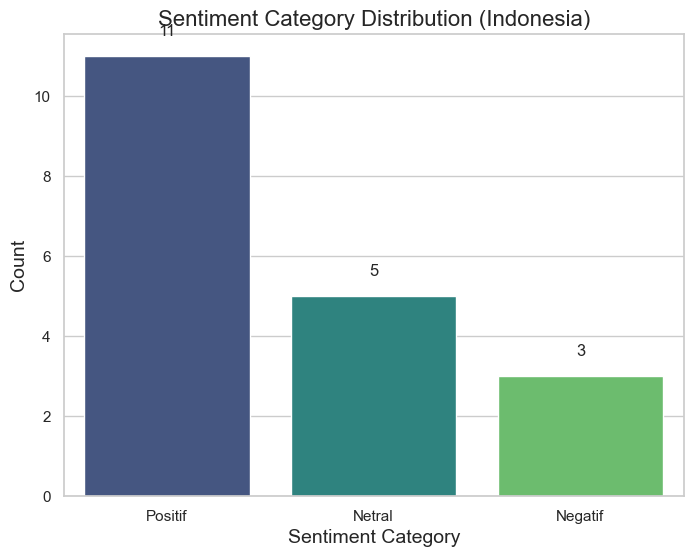

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot using seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts1.index, y=sentiment_counts1.values, palette='viridis')

# Add labels and title
plt.title('Sentiment Category Distribution (Indonesia)', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the values on top of the bars
for i in range(len(sentiment_counts1)):
    plt.text(i, sentiment_counts1.values[i] + 0.5, 
             sentiment_counts1.values[i], 
             ha='center', fontsize=12)

# Show the plot
plt.show()

#### Word Cloud (All and Based on Sentiment)

In [49]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


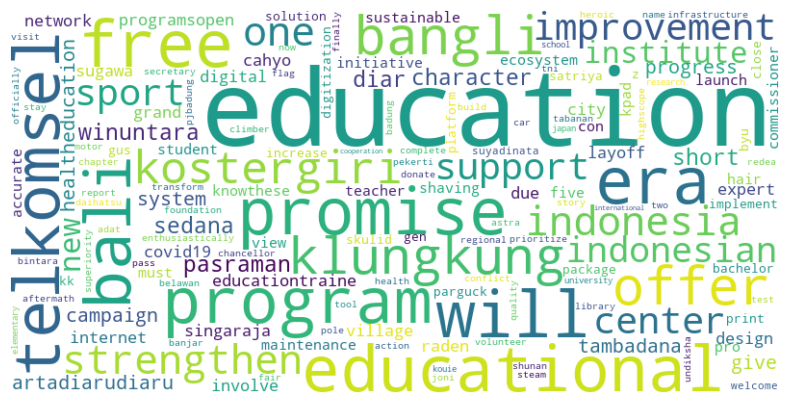

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text from the 'Churn_Reason' column into a single string
text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1['cleaned_title_translated'])

# Create a word cloud
wordcloud_inggris = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_inggris, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()

Based on Sentiment

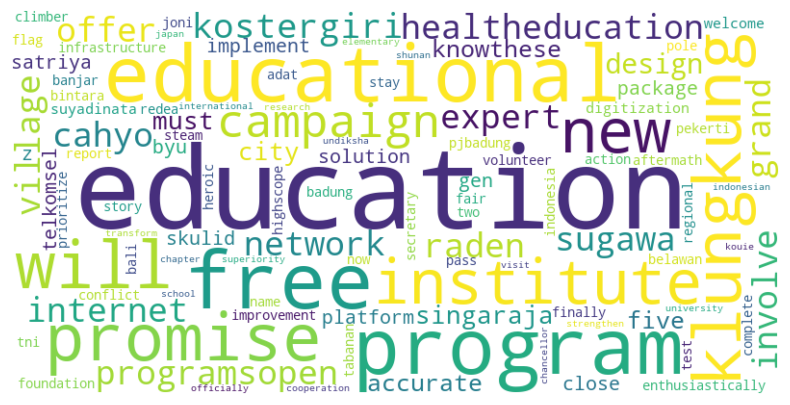

In [51]:
# Sentimen Positif
if data_sentiment1[data_sentiment1['sentiment_category_english'] == "Positif"].shape[0] != 0:
    data_sentiment1_positif = data_sentiment1[data_sentiment1['sentiment_category_english'] == "Positif"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_positif['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_positif_inggris = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_positif_inggris, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else:
    print("Tidak ada sentimen positif pada berita")

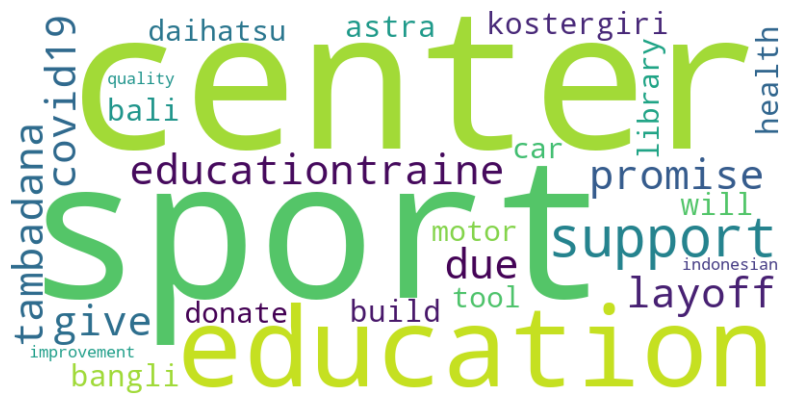

In [52]:
# Sentimen Negatif
if data_sentiment1[data_sentiment1['sentiment_category_english'] == "Negatif"].shape[0] != 0:
    data_sentiment1_negatif = data_sentiment1[data_sentiment1['sentiment_category_english'] == "Negatif"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_negatif['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_negatif_inggris = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_negatif_inggris, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen negatif pada berita")

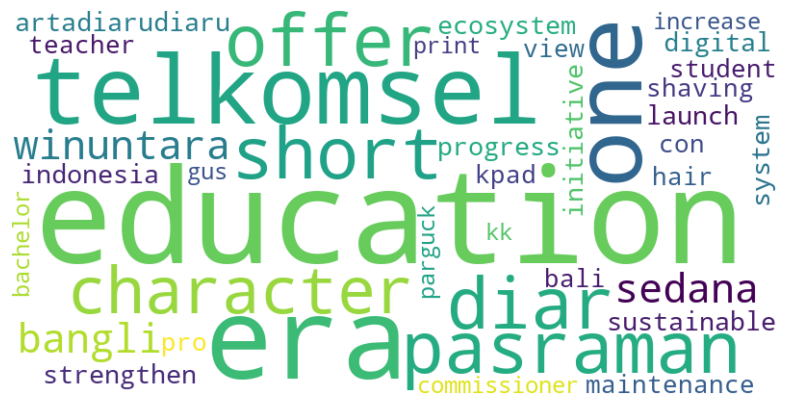

In [53]:
# Sentimen Netral
if data_sentiment1[data_sentiment1['sentiment_category_english'] == "Netral"].shape[0] != 0:
    data_sentiment1_netral = data_sentiment1[data_sentiment1['sentiment_category_english'] == "Netral"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_netral['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_netral_inggris = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_netral_inggris, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen netral pada berita")

### 2. VADER

#### Sentiment

In [54]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [55]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to get sentiment scores with VADER
def get_sentiment_vader(text):
    # VADER provides a compound score which ranges from -1 (negative) to 1 (positive)
    score = sia.polarity_scores(text)['compound']
    return score

# Apply VADER to get the sentiment scores
data_sentiment1['sentiment_score_english_vader'] = data_sentiment1['cleaned_title_translated'].apply(get_sentiment_vader)

# Categorize sentiment with only 2 categories
def categorize_sentiment(score):
    if score > 0.05:  # Threshold for positive sentiment
        return 'Positif'
    elif score < -0.05:  # Threshold for negative sentiment
        return 'Negatif'
    else:
        return 'Netral'  # Scores between -0.05 and 0.05 considered neutral

data_sentiment1['sentiment_category_english_vader'] = data_sentiment1['sentiment_score_english_vader'].apply(categorize_sentiment)

C:\Users\asus\AppData\Local\Temp\ipykernel_21016\17249303.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment1['sentiment_score_english_vader'] = data_sentiment1['cleaned_title_translated'].apply(get_sentiment_vader)
C:\Users\asus\AppData\Local\Temp\ipykernel_21016\17249303.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment1['sentiment_category_english_vader'] = data_sentiment1['sentiment_score_english_vader'].apply(categorize_sentiment)


In [56]:
data_sentiment1.head()

,keyword,title_translated,cleaned_title_translated,sentiment_score_english,sentiment_category_english,sentiment_score_english_vader,sentiment_category_english_vader
0,pendidikan,Diar offers a short pasraman for character edu...,diar offer a short pasraman for character educ...,0.000,Netral,0.0000,Netral
1,pendidikan,Winuntara: The Bangli Era Sedana Arta-Diaru-Di...,winuntara the bangli era sedana artadiarudiaru...,0.000,Netral,0.1531,Positif
2,pendidikan,"Campaign in Klungkung, Koster-Giri promises fr...",campaign in klungkung kostergiri promise free ...,0.400,Positif,0.6808,Positif
3,pendidikan,Tamba-dana promise to give education-training ...,tambadana promise to give educationtraine for ...,-0.125,Negatif,0.3182,Positif
4,pendidikan,Raden Cahyo Offers Free Education Programs-Ope...,raden cahyo offer free education programsopen ...,0.400,Positif,0.5106,Positif


In [57]:
sentiment_counts1_vader = data_sentiment1['sentiment_category_english_vader'].value_counts()
sentiment_counts1_vader

sentiment_category_english_vader
Positif    14
Netral      4
Negatif     1
Name: count, dtype: int64

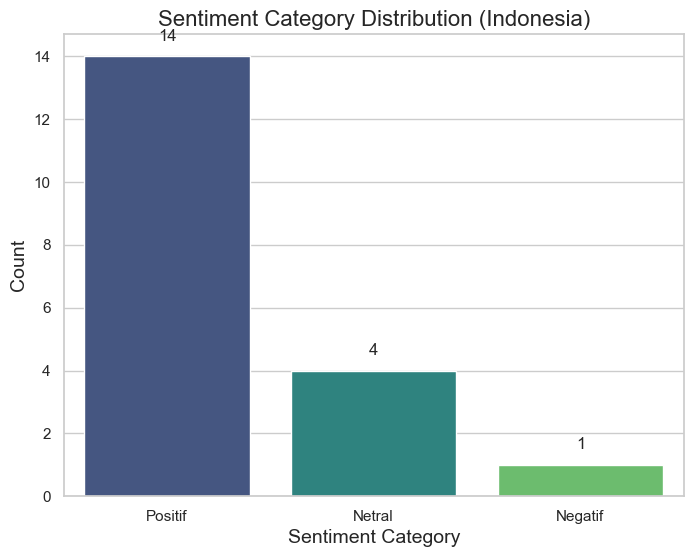

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot using seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts1_vader.index, y=sentiment_counts1_vader.values, palette='viridis')

# Add labels and title
plt.title('Sentiment Category Distribution (Indonesia)', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the values on top of the bars
for i in range(len(sentiment_counts1_vader)):
    plt.text(i, sentiment_counts1_vader.values[i] + 0.5, 
             sentiment_counts1_vader.values[i], 
             ha='center', fontsize=12)

# Show the plot
plt.show()

#### Word Cloud (Based on Sentiment Only)

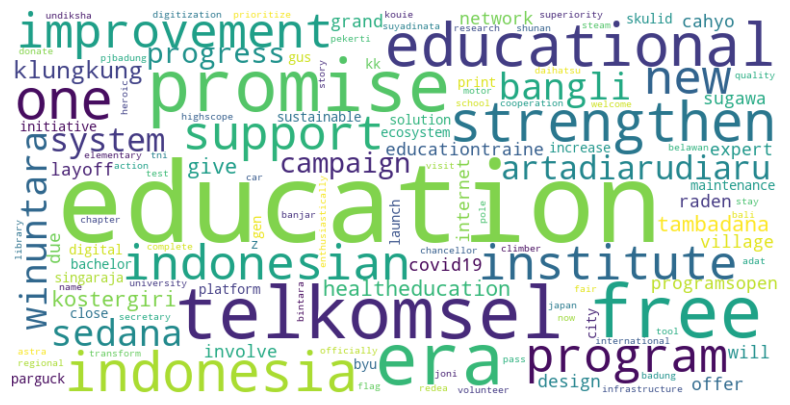

In [59]:
# Sentimen Positif
if data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Positif"].shape[0] != 0:
    data_sentiment1_positif_vader = data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Positif"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_positif_vader['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_positif_inggris_vader = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_positif_inggris_vader, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen positif pada berita")

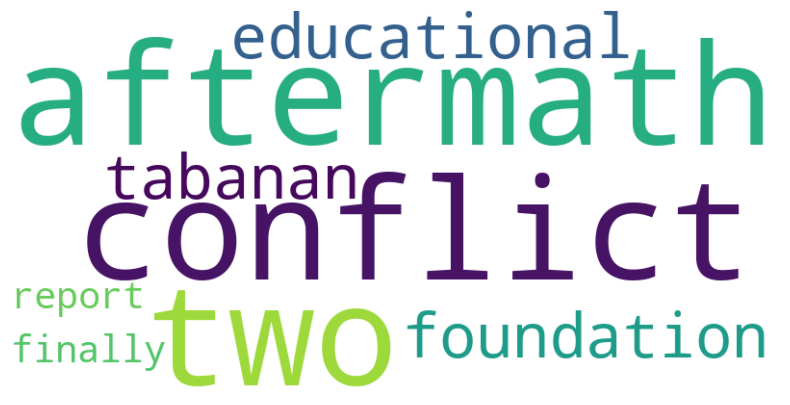

In [60]:
# Sentimen Negatif
if data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Negatif"].shape[0] != 0:
    data_sentiment1_negatif_vader = data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Negatif"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_negatif_vader['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_negatif_inggris_vader = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_negatif_inggris_vader, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen negatif pada berita")

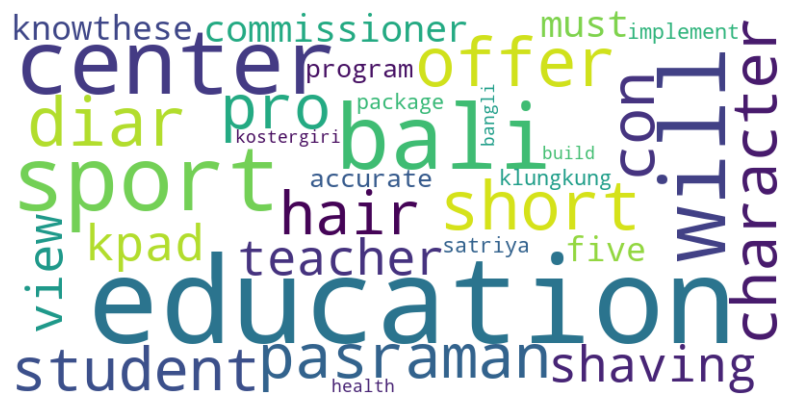

In [61]:
# Sentimen Netral
if data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Netral"].shape[0] != 0:
    data_sentiment1_netral_vader = data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Netral"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_netral_vader['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_netral_inggris_vader = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_netral_inggris_vader, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen netral pada berita")

### 3. IndoBERT

#### Sentiment

In [62]:
pip install transforms torch

Note: you may need to restart the kernel to use updated packages.


In [63]:
data_sentiment2 = data_ready[['keyword','title','cleaned_title','content']]
data_sentiment2

,keyword,title,cleaned_title,content
0,pendidikan,Diar Tawarkan Pasraman Singkat untuk Pendidika...,diar tawar pasraman singkat untuk didik karakter,Calon wakil bupati (cawabup) Bangli nomor urut...
1,pendidikan,Winuntara: Sistem Pendidikan Bangli Era Sedana...,winuntara sistem didik bangli era dana artadia...,Calon wakil bupati (cawabup) Bangli nomor urut...
2,pendidikan,"Kampanye di Klungkung, Koster-Giri Janjikan Ke...",kampanye di klungkung kostergiri janji kesehat...,Calon gubernur dan wakil gubernur Bali nomor u...
3,pendidikan,Tamba-Dana Janji Beri Pendidikan-Pelatihan bag...,tambadana janji beri pendidikanpelatihan bagi ...,"Pasangan calon (paslon) nomor urut 1, I Nengah..."
4,pendidikan,Raden Cahyo Tawarkan Program Pendidikan Gratis...,raden cahyo tawar program didik gratisbuka jar...,"Calon bupati Bangli nomor urut 1, Raden Cahyo ..."
5,pendidikan,Sugawa Akan Libatkan Ahli untuk Grand Design S...,sugawa akan libat ahli untuk grand design sing...,"Calon bupati (cabup) Buleleng nomor urut 1, Ny..."
6,pendidikan,Kuatkan Ekosistem Digital untuk Pendidikan Ber...,kuat ekosistem digital untuk didik lanjut di i...,Teknologi
7,pendidikan,"Pro Kontra Guru Cukur Rambut Murid, Ini Pandan...",pro kontra guru cukur rambut murid ini pandang...,Pendidikan
8,pendidikan,Wajib Tahu! Ini Lima Program Jitu Pendidikan y...,wajib tahu ini lima program jitu didik yang ak...,Politika
9,pendidikan,"Tingkatkan Pendidikan, Gus Par-Pandu Cetak Sat...",tingkat didik gus parpandu cetak satu kk satu ...,Politika


In [64]:
from transformers import BertForSequenceClassification, BertTokenizer
import torch

# Load the saved model and tokenizer
model_load_path = "C:/Users/asus/OneDrive/BPS/Neraca/smsa_bpsbali_indobert_model"  # The path where the model is saved
tokenizer_load_path = "C:/Users/asus/OneDrive/BPS/Neraca/smsa_bpsbali_indobert_tokenizer"  # The path where the tokenizer is saved

# Load the model and tokenizer
model = BertForSequenceClassification.from_pretrained(model_load_path)
tokenizer = BertTokenizer.from_pretrained(tokenizer_load_path)

In [65]:
from torch.nn.functional import softmax  # Softmax function to convert logits to probabilities

# Initialize an empty list to collect predictions
sentiment_predict = []
probabilities = []

# Loop through the cleaned titles
for text in data_sentiment2['cleaned_title']:
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)

    # Make prediction
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # Disable gradients for inference
        outputs = model(**inputs)

    # Get the logits (raw scores)
    logits = outputs.logits
    
    # Apply softmax to convert logits to probabilities
    probs = softmax(logits, dim=-1)  # Softmax along the class dimension (last dimension)

    # Get the predicted class (index of max logit)
    predicted_class = logits.argmax(dim=-1).item()

    # Get the probability of the predicted class
    predicted_prob = probs[0, predicted_class].item()

    # Convert prediction to string label
    if predicted_class == 0:
        sentiment_label = "positif"
    elif predicted_class == 1:
        sentiment_label = "netral"
    else:
        sentiment_label = "negatif"

    # Append the sentiment label and its probability
    sentiment_predict.append(sentiment_label)
    probabilities.append(predicted_prob)

# After the loop, create the DataFrame
sentiment_predict_df = pd.DataFrame({
    'sentiment': sentiment_predict,
    'probability': probabilities
})

# Add it as a new column to the original DataFrame
data_sentiment2['sentiment_score_indonesia'] = sentiment_predict_df['probability']
data_sentiment2['sentiment_category_indonesia'] = sentiment_predict_df['sentiment']

# Optionally, you can print the DataFrame to check the results
data_sentiment2


C:\Users\asus\AppData\Local\Temp\ipykernel_21016\1096017218.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment2['sentiment_score_indonesia'] = sentiment_predict_df['probability']
C:\Users\asus\AppData\Local\Temp\ipykernel_21016\1096017218.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment2['sentiment_category_indonesia'] = sentiment_predict_df['sentiment']


,keyword,title,cleaned_title,content,sentiment_score_indonesia,sentiment_category_indonesia
0,pendidikan,Diar Tawarkan Pasraman Singkat untuk Pendidika...,diar tawar pasraman singkat untuk didik karakter,Calon wakil bupati (cawabup) Bangli nomor urut...,0.993038,netral
1,pendidikan,Winuntara: Sistem Pendidikan Bangli Era Sedana...,winuntara sistem didik bangli era dana artadia...,Calon wakil bupati (cawabup) Bangli nomor urut...,0.944724,netral
2,pendidikan,"Kampanye di Klungkung, Koster-Giri Janjikan Ke...",kampanye di klungkung kostergiri janji kesehat...,Calon gubernur dan wakil gubernur Bali nomor u...,0.975180,netral
3,pendidikan,Tamba-Dana Janji Beri Pendidikan-Pelatihan bag...,tambadana janji beri pendidikanpelatihan bagi ...,"Pasangan calon (paslon) nomor urut 1, I Nengah...",0.994953,netral
4,pendidikan,Raden Cahyo Tawarkan Program Pendidikan Gratis...,raden cahyo tawar program didik gratisbuka jar...,"Calon bupati Bangli nomor urut 1, Raden Cahyo ...",0.997021,netral
5,pendidikan,Sugawa Akan Libatkan Ahli untuk Grand Design S...,sugawa akan libat ahli untuk grand design sing...,"Calon bupati (cabup) Buleleng nomor urut 1, Ny...",0.955547,netral
6,pendidikan,Kuatkan Ekosistem Digital untuk Pendidikan Ber...,kuat ekosistem digital untuk didik lanjut di i...,Teknologi,0.633294,positif
7,pendidikan,"Pro Kontra Guru Cukur Rambut Murid, Ini Pandan...",pro kontra guru cukur rambut murid ini pandang...,Pendidikan,0.991652,netral
8,pendidikan,Wajib Tahu! Ini Lima Program Jitu Pendidikan y...,wajib tahu ini lima program jitu didik yang ak...,Politika,0.985573,netral
9,pendidikan,"Tingkatkan Pendidikan, Gus Par-Pandu Cetak Sat...",tingkat didik gus parpandu cetak satu kk satu ...,Politika,0.997276,netral


In [66]:
sentiment_counts2 = data_sentiment2['sentiment_category_indonesia'].value_counts()
sentiment_counts2

sentiment_category_indonesia
netral     18
positif     1
Name: count, dtype: int64

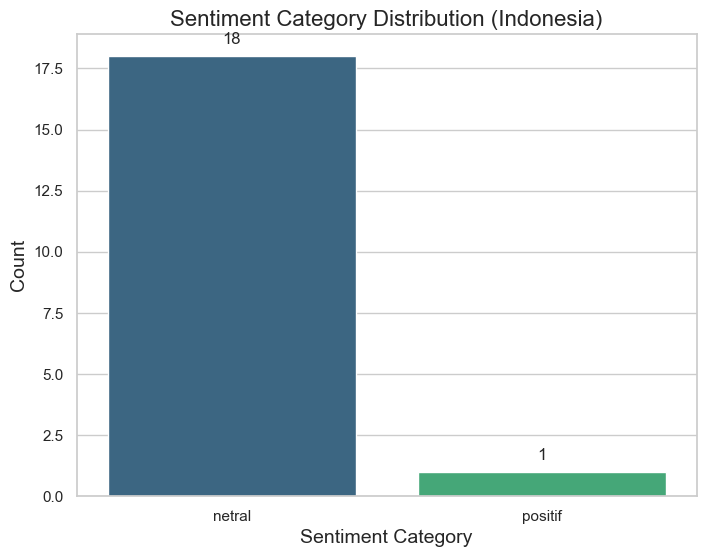

In [67]:
import seaborn as sns

# Set the style of the plot using seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts2.index, y=sentiment_counts2.values, palette='viridis')

# Add labels and title
plt.title('Sentiment Category Distribution (Indonesia)', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the values on top of the bars
for i in range(len(sentiment_counts2)):
    plt.text(i, sentiment_counts2.values[i] + 0.5, 
             sentiment_counts2.values[i], 
             ha='center', fontsize=12)

# Show the plot
plt.show()

#### Word Cloud (All and Based on Sentiment)

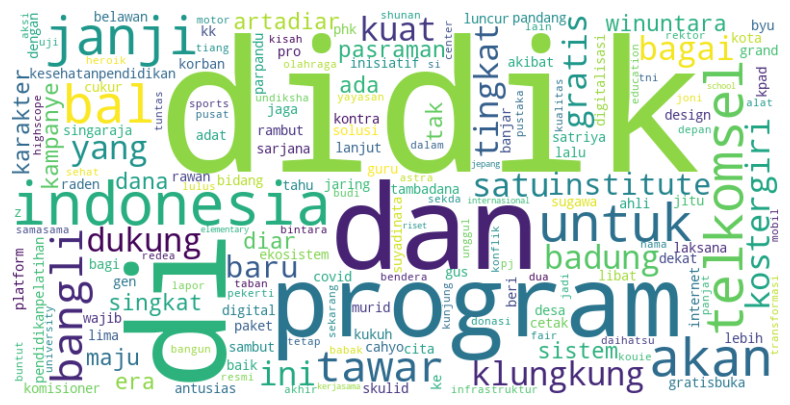

In [68]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text from the 'Churn_Reason' column into a single string
text = " ".join(cleaned_title for cleaned_title in data_sentiment2['cleaned_title'])

# Create a word cloud
wordcloud_indonesia = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_indonesia, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()

Based on Sentiment

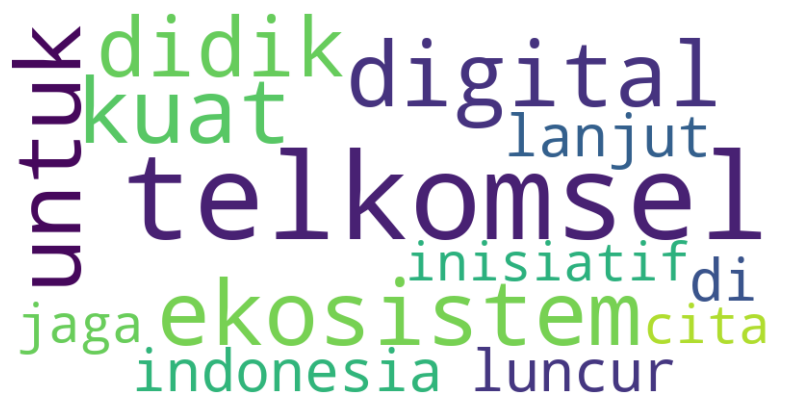

In [69]:
# Sentimen Positif
if data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "positif"].shape[0] != 0:
    data_sentiment2_positif = data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "positif"]

    text = " ".join(cleaned_title for cleaned_title in data_sentiment2_positif['cleaned_title'])

    # Create a word cloud
    wordcloud_positif_indonesia = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_positif_indonesia, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen positif pada berita")

In [70]:
# Sentimen Negatif
if data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "negatif"].shape[0] != 0:
    data_sentiment2_negatif = data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "negatif"]

    text = " ".join(cleaned_title for cleaned_title in data_sentiment2_negatif['cleaned_title'])

    # Create a word cloud
    wordcloud_negatif_indonesia = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_negatif_indonesia, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen negatif pada berita")

Tidak ada sentimen negatif pada berita


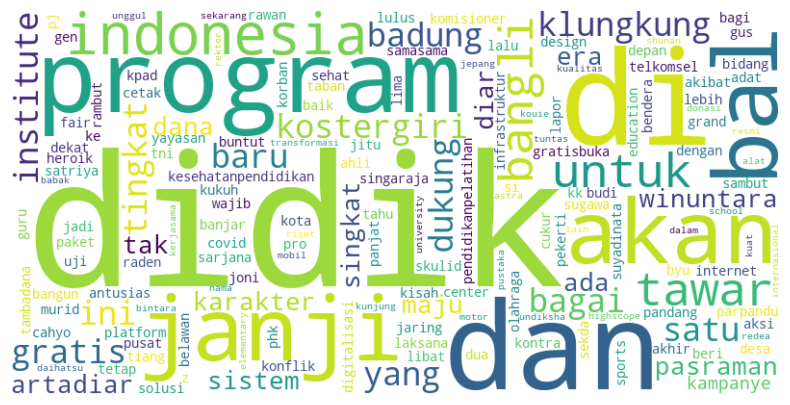

In [71]:
# Sentimen Netral
if data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "netral"].shape[0] != 0:
    data_sentiment2_netral = data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "netral"]

    text = " ".join(cleaned_title for cleaned_title in data_sentiment2_netral['cleaned_title'])

    # Create a word cloud
    wordcloud_netral_indonesia = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_netral_indonesia, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen netral pada berita")

### Export Result

In [72]:
print(data_sentiment1.shape)
data_sentiment1.head()

(19, 7)


,keyword,title_translated,cleaned_title_translated,sentiment_score_english,sentiment_category_english,sentiment_score_english_vader,sentiment_category_english_vader
0,pendidikan,Diar offers a short pasraman for character edu...,diar offer a short pasraman for character educ...,0.000,Netral,0.0000,Netral
1,pendidikan,Winuntara: The Bangli Era Sedana Arta-Diaru-Di...,winuntara the bangli era sedana artadiarudiaru...,0.000,Netral,0.1531,Positif
2,pendidikan,"Campaign in Klungkung, Koster-Giri promises fr...",campaign in klungkung kostergiri promise free ...,0.400,Positif,0.6808,Positif
3,pendidikan,Tamba-dana promise to give education-training ...,tambadana promise to give educationtraine for ...,-0.125,Negatif,0.3182,Positif
4,pendidikan,Raden Cahyo Offers Free Education Programs-Ope...,raden cahyo offer free education programsopen ...,0.400,Positif,0.5106,Positif


In [73]:
print(data_sentiment2.shape)
data_sentiment2.head()

(19, 6)


,keyword,title,cleaned_title,content,sentiment_score_indonesia,sentiment_category_indonesia
0,pendidikan,Diar Tawarkan Pasraman Singkat untuk Pendidika...,diar tawar pasraman singkat untuk didik karakter,Calon wakil bupati (cawabup) Bangli nomor urut...,0.993038,netral
1,pendidikan,Winuntara: Sistem Pendidikan Bangli Era Sedana...,winuntara sistem didik bangli era dana artadia...,Calon wakil bupati (cawabup) Bangli nomor urut...,0.944724,netral
2,pendidikan,"Kampanye di Klungkung, Koster-Giri Janjikan Ke...",kampanye di klungkung kostergiri janji kesehat...,Calon gubernur dan wakil gubernur Bali nomor u...,0.975180,netral
3,pendidikan,Tamba-Dana Janji Beri Pendidikan-Pelatihan bag...,tambadana janji beri pendidikanpelatihan bagi ...,"Pasangan calon (paslon) nomor urut 1, I Nengah...",0.994953,netral
4,pendidikan,Raden Cahyo Tawarkan Program Pendidikan Gratis...,raden cahyo tawar program didik gratisbuka jar...,"Calon bupati Bangli nomor urut 1, Raden Cahyo ...",0.997021,netral


In [74]:
# Assigning columns individually
sentiment_result = data_sentiment2.copy()  # Copy data_sentiment2 to avoid modifying the original

# Assign columns from data_sentiment1 to sentiment_result
sentiment_result['title_translated'] = data_sentiment1['title_translated']
sentiment_result['cleaned_title_translated'] = data_sentiment1['cleaned_title_translated']
sentiment_result['sentiment_category_english'] = data_sentiment1['sentiment_category_english']
sentiment_result['sentiment_score_english'] = data_sentiment1['sentiment_score_english']
sentiment_result['sentiment_category_english_vader'] = data_sentiment1['sentiment_category_english_vader']
sentiment_result['sentiment_score_english_vader'] = data_sentiment1['sentiment_score_english_vader']

print(sentiment_result.shape)
sentiment_result.head()

(19, 12)


,keyword,title,cleaned_title,content,sentiment_score_indonesia,sentiment_category_indonesia,title_translated,cleaned_title_translated,sentiment_category_english,sentiment_score_english,sentiment_category_english_vader,sentiment_score_english_vader
0,pendidikan,Diar Tawarkan Pasraman Singkat untuk Pendidika...,diar tawar pasraman singkat untuk didik karakter,Calon wakil bupati (cawabup) Bangli nomor urut...,0.993038,netral,Diar offers a short pasraman for character edu...,diar offer a short pasraman for character educ...,Netral,0.000,Netral,0.0000
1,pendidikan,Winuntara: Sistem Pendidikan Bangli Era Sedana...,winuntara sistem didik bangli era dana artadia...,Calon wakil bupati (cawabup) Bangli nomor urut...,0.944724,netral,Winuntara: The Bangli Era Sedana Arta-Diaru-Di...,winuntara the bangli era sedana artadiarudiaru...,Netral,0.000,Positif,0.1531
2,pendidikan,"Kampanye di Klungkung, Koster-Giri Janjikan Ke...",kampanye di klungkung kostergiri janji kesehat...,Calon gubernur dan wakil gubernur Bali nomor u...,0.975180,netral,"Campaign in Klungkung, Koster-Giri promises fr...",campaign in klungkung kostergiri promise free ...,Positif,0.400,Positif,0.6808
3,pendidikan,Tamba-Dana Janji Beri Pendidikan-Pelatihan bag...,tambadana janji beri pendidikanpelatihan bagi ...,"Pasangan calon (paslon) nomor urut 1, I Nengah...",0.994953,netral,Tamba-dana promise to give education-training ...,tambadana promise to give educationtraine for ...,Negatif,-0.125,Positif,0.3182
4,pendidikan,Raden Cahyo Tawarkan Program Pendidikan Gratis...,raden cahyo tawar program didik gratisbuka jar...,"Calon bupati Bangli nomor urut 1, Raden Cahyo ...",0.997021,netral,Raden Cahyo Offers Free Education Programs-Ope...,raden cahyo offer free education programsopen ...,Positif,0.400,Positif,0.5106


In [75]:
sentiment_result.to_excel("C:/Users/asus/OneDrive/BPS/Neraca/sentimentresult_sektor15_triwulan4_bali.xlsx")